In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

import statsmodels.api as sm
import scipy.stats.distributions as dist
from scipy.stats import t,ttest_rel
from statsmodels.stats.weightstats import ztest

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data15 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2015.csv');  
data16 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2016.csv');  
data17 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2017.csv');  
data18 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2018.csv');  
data19 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2019.csv');

In [2]:
data15 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2015.csv')
data15.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [3]:
print('The dataset has {} rows and {} columns.'.format(data15.shape[0],data15.shape[1]))

The dataset has 158 rows and 12 columns.


In [4]:
data19 = pd.read_csv('/Users/manibabukalisetti/Desktop/Projects/Tableau WHR/2019.csv')
data19.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [5]:
print('The dataset has {} rows and {} columns.'.format(data19.shape[0],data19.shape[1]))

The dataset has 156 rows and 9 columns.


In [6]:
collection = [data15,data16,data17,data18,data19]

# Naming the datasets
data15.name = 'data15'
data16.name = 'data16'
data17.name = 'data17'
data18.name = 'data18'
data19.name = 'data19'

for data in collection:
    if data.isnull().values.any():
        print("The '{}' dataset has null entries.".format(data.name))

The 'data18' dataset has null entries.


In [7]:
data18.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [8]:
for data in collection:
    if data.duplicated().values.any():
        print("The '{}' dataset has duplicated entries.".format(data.name))

In [9]:
len(data15),len(data16),len(data17),len(data18),len(data19)

(158, 157, 155, 156, 156)

In [10]:
data_scores = pd.DataFrame()
DS = pd.DataFrame()

data_scores[['country','region','2015_rank','2015_score']] = data15[['Country','Region','Happiness Rank','Happiness Score']]

d16 = pd.DataFrame()
d17 = pd.DataFrame()
d18 = pd.DataFrame()
d19 = pd.DataFrame()

d16[['country','2016_rank','2016_score']] = data16[['Country','Happiness Rank','Happiness Score']]
d17[['country','2017_rank','2017_score']] = data17[['Country','Happiness.Rank','Happiness.Score']]
d18[['country','2018_rank','2018_score']] = data18[['Country or region','Overall rank','Score']]
d19[['country','2019_rank','2019_score']] = data19[['Country or region','Overall rank','Score']]

In [11]:
data_scores = data_scores.merge(d16,on=['country'])
data_scores = data_scores.merge(d17,on=['country'])
data_scores = data_scores.merge(d18,on=['country'])
data_scores = data_scores.merge(d19,on=['country'])

data_scores.head(10)

country                     region  2015_rank  2015_score  2016_rank  \
0  Switzerland             Western Europe          1       7.587          2   
1      Iceland             Western Europe          2       7.561          3   
2      Denmark             Western Europe          3       7.527          1   
3       Norway             Western Europe          4       7.522          4   
4       Canada              North America          5       7.427          6   
5      Finland             Western Europe          6       7.406          5   
6  Netherlands             Western Europe          7       7.378          7   
7       Sweden             Western Europe          8       7.364         10   
8  New Zealand  Australia and New Zealand          9       7.286          8   
9    Australia  Australia and New Zealand         10       7.284          9   

   2016_score  2017_rank  2017_score  2018_rank  2018_score  2019_rank  \
0       7.509          4       7.494          5       7.487          6   
1       7.501          3       7.504          4       7.495          4   
2       7.526          2       7.522          3       7.555          2   
3       7.498          1       7.537          2       7.594          3   
4       7.404          7       7.316          7       7.328          9   
5       7.413          5       7.469          1       7.632          1   
6       7.339          6       7.377          6       7.441          5   
7       7.291          9       7.284          9       7.314          7   
8       7.334          8       7.314          8       7.324          8   
9       7.313         10       7.284         10       7.272         11   

   2019_score  
0       7.480  
1       7.494  
2       7.600  
3       7.554  
4       7.278  
5       7.769  
6       7.488  
7       7.343  
8       7.307  
9       7.228

In [12]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = data_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = data_scores['country'],
            z = data_scores['2015_score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
happiness_map = gobj.Figure(data=[data])#,layout=layout)

happiness_map.update_layout(title_text = 'Happiness Score by Country (Year 2015)')

#plotting the map
iplot(happiness_map)

In [13]:
data_scores_europe = data_scores[(data_scores['region'] == 'Western Europe') | (data_scores['region'] == 'Central and Eastern Europe')]

#Initializing the data variable
data = dict(type = 'choropleth',
            locations = data_scores_europe['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = data_scores_europe['country'],
            z = data_scores_europe['2015_score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

#Initializing the layout variable
layout = dict(geo=dict(scope='europe'))

#Initializing the object for graph_objs.Figure class
happiness_europe = gobj.Figure(data=[data],layout=layout)

happiness_europe.update_layout(title_text = 'Happiness Score in Europe (Year 2015)')

#plotting the map
iplot(happiness_europe)

<Figure size 1000x700 with 0 Axes>

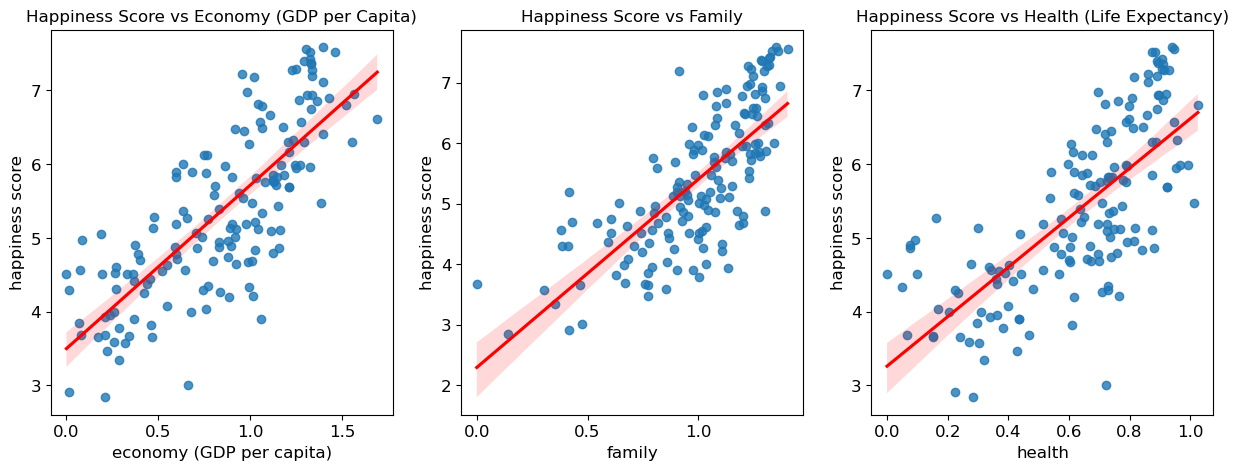

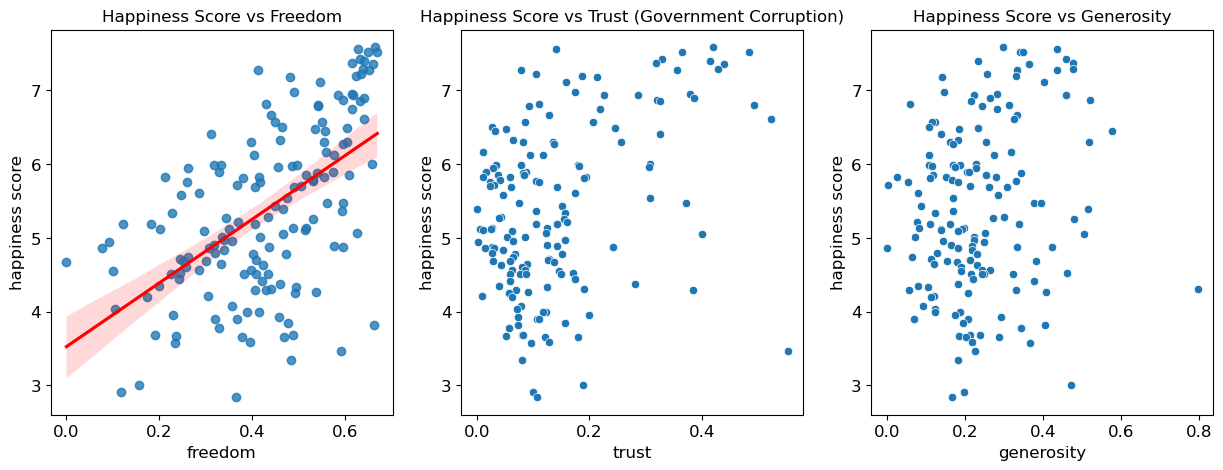

In [14]:
fig = plt.figure(figsize=(10,7))
(topfig,bottomfig) = fig.subfigures(2,1)

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.regplot(ax=axes[0],data=data15,x='Economy (GDP per Capita)',y='Happiness Score',line_kws={'color':'r'})
sns.regplot(ax=axes[1],data=data15,x='Family',y='Happiness Score',line_kws={'color':'r'})
sns.regplot(ax=axes[2],data=data15,x='Health (Life Expectancy)',y='Happiness Score',line_kws={'color':'r'})
axes[0].set_title('Happiness Score vs Economy (GDP per Capita)',fontsize=12)
axes[0].xaxis.set_tick_params(labelsize=12)
axes[0].yaxis.set_tick_params(labelsize=12)
axes[0].set_xlabel('economy (GDP per capita)',fontsize=12)
axes[0].set_ylabel('happiness score',fontsize=12)
axes[1].set_title('Happiness Score vs Family',fontsize=12)
axes[1].xaxis.set_tick_params(labelsize=12)
axes[1].yaxis.set_tick_params(labelsize=12)
axes[1].set_xlabel('family',fontsize=12)
axes[1].set_ylabel('happiness score',fontsize=12)
axes[2].set_title('Happiness Score vs Health (Life Expectancy)',fontsize=12)
axes[2].xaxis.set_tick_params(labelsize=12)
axes[2].yaxis.set_tick_params(labelsize=12)
axes[2].set_xlabel('health',fontsize=12)
axes[2].set_ylabel('happiness score',fontsize=12)

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.regplot(ax=axes[0],data=data15,x='Freedom',y='Happiness Score',line_kws={'color':'r'})
sns.scatterplot(ax=axes[1],data=data15,x='Trust (Government Corruption)',y='Happiness Score')
sns.scatterplot(ax=axes[2],data=data15,x='Generosity',y='Happiness Score')
axes[0].set_title('Happiness Score vs Freedom',fontsize=12)
axes[0].xaxis.set_tick_params(labelsize=12)
axes[0].yaxis.set_tick_params(labelsize=12)
axes[0].set_xlabel('freedom',fontsize=12)
axes[0].set_ylabel('happiness score',fontsize=12)
axes[1].set_title('Happiness Score vs Trust (Government Corruption)',fontsize=12)
axes[1].xaxis.set_tick_params(labelsize=12)
axes[1].yaxis.set_tick_params(labelsize=12)
axes[1].set_xlabel('trust',fontsize=12)
axes[1].set_ylabel('happiness score',fontsize=12)
axes[2].set_title('Happiness Score vs Generosity',fontsize=12);
axes[2].xaxis.set_tick_params(labelsize=12)
axes[2].yaxis.set_tick_params(labelsize=12)
axes[2].set_xlabel('generosity',fontsize=12)
axes[2].set_ylabel('happiness score',fontsize=12);

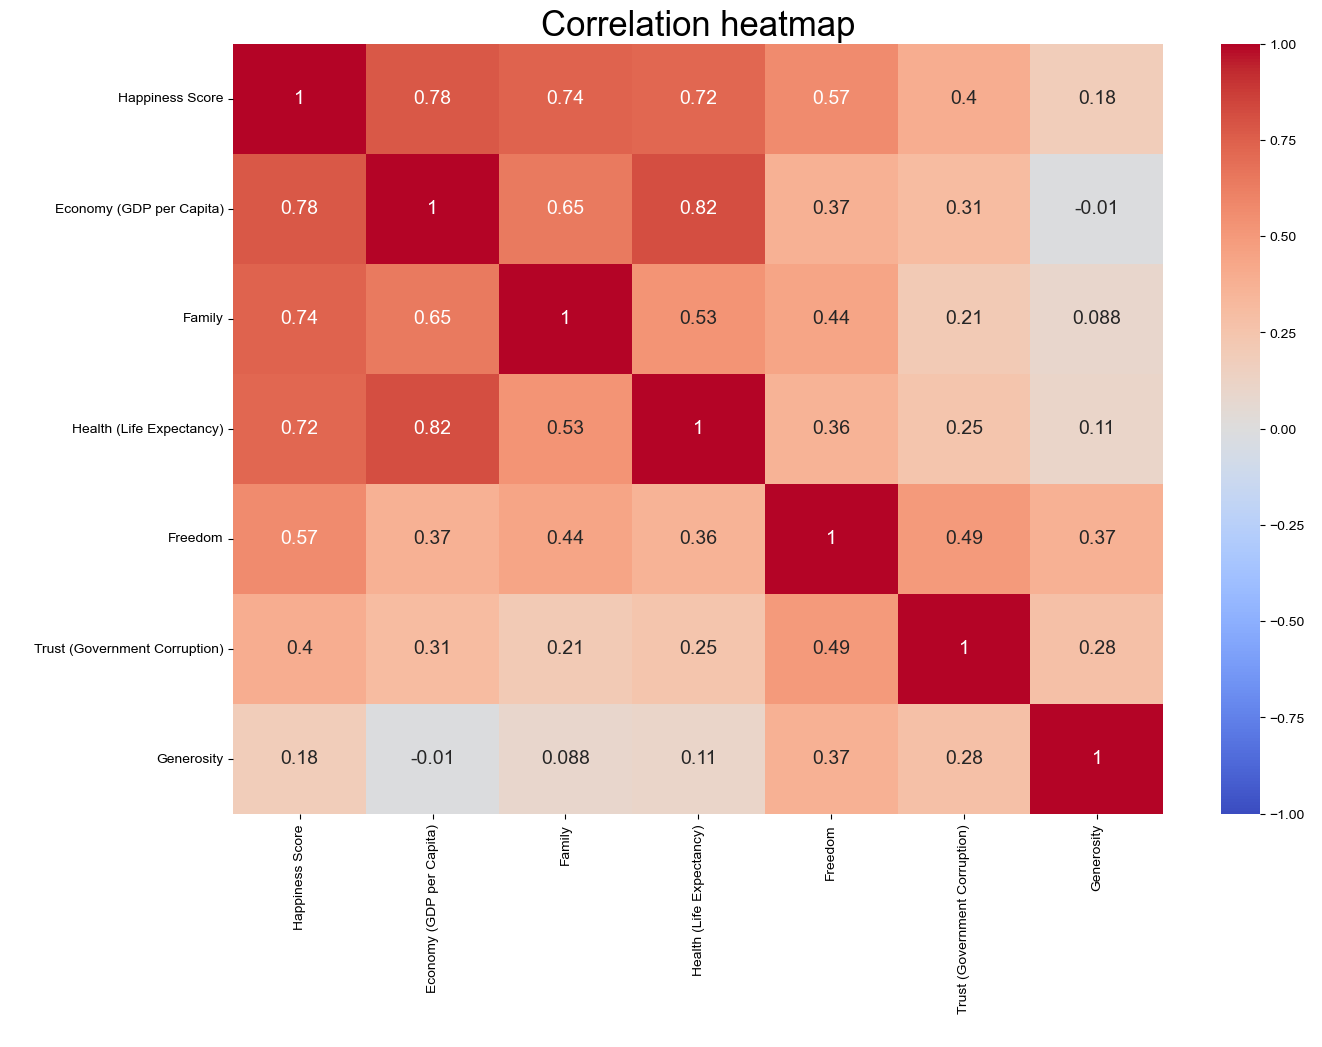

In [15]:
d15 = data15.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(d15.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm',annot_kws={"fontsize":14})
sns.set(font_scale=2)
plt.title('Correlation heatmap',fontsize=25)
plt.show();

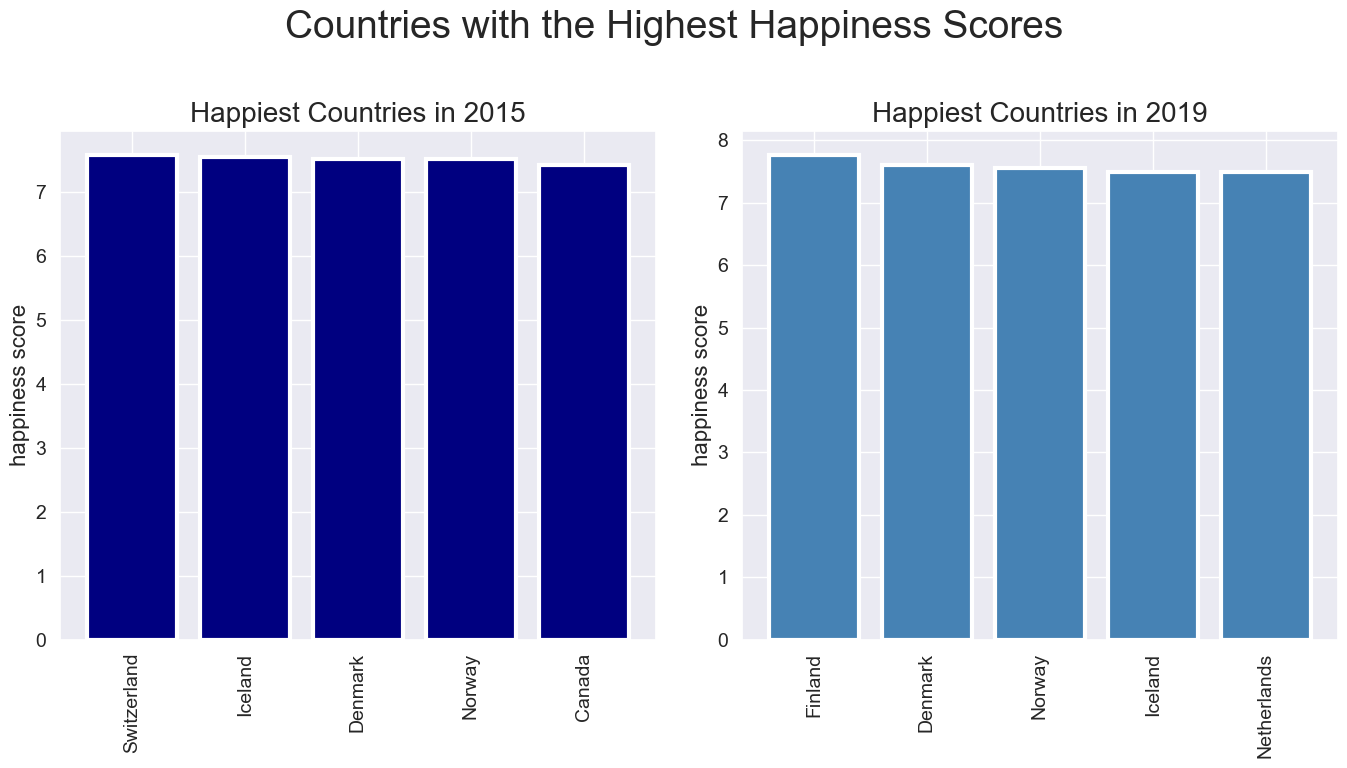

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,8))

data_scores15 = data_scores.copy().sort_values(by=['2015_score'],ascending=False).head()

ax1.bar(data_scores15['country'],data_scores15['2015_score'],color='navy',linewidth=3)
ax1.set_title('Happiest Countries in 2015',fontsize=20)
ax1.set_ylabel('happiness score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

data_scores19 = data_scores.copy().sort_values(by=['2019_score'],ascending=False).head()
ax2.bar(data_scores19['country'],data_scores19['2019_score'],color='steelblue',linewidth=3)
ax2.set_title('Happiest Countries in 2019',fontsize=20)
ax2.set_ylabel('happiness score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Highest Happiness Scores",fontsize=28)

plt.tight_layout()

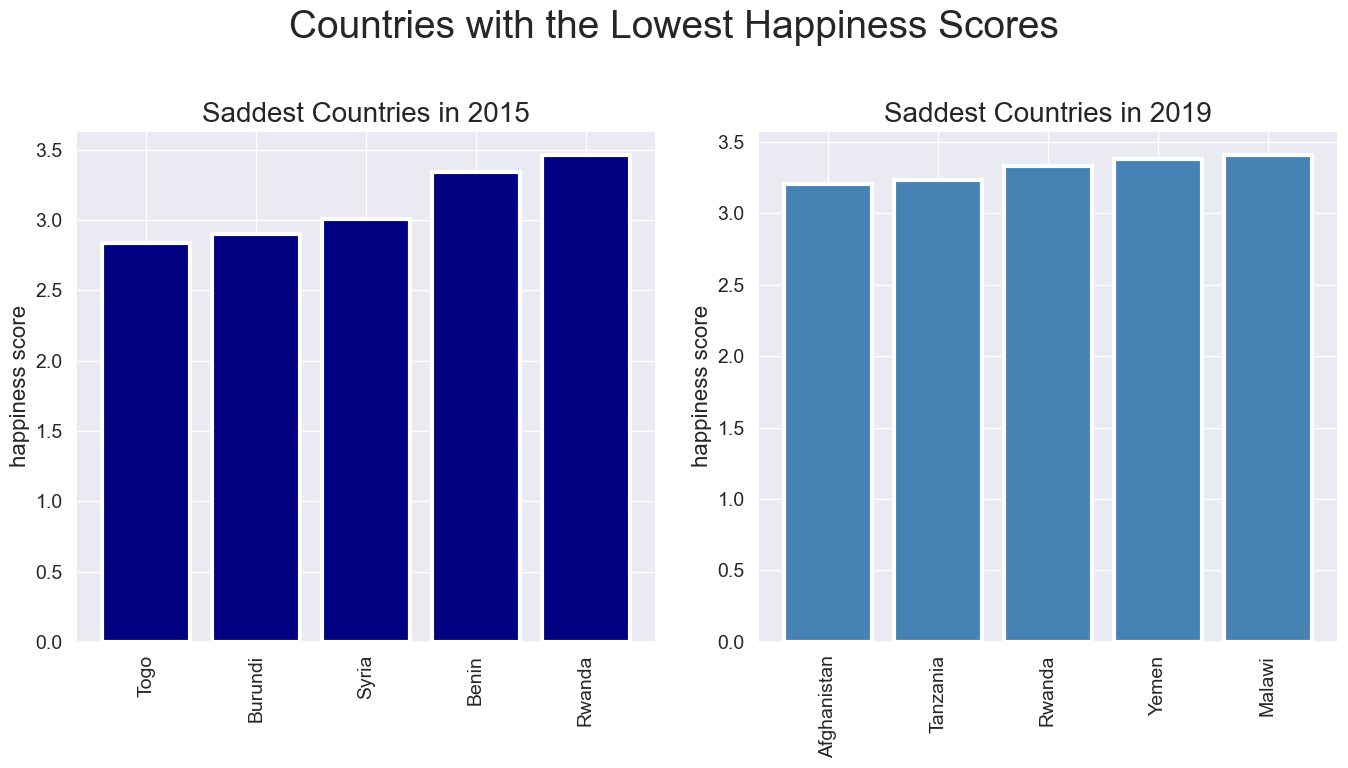

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,8))

data_scores15 = data_scores.copy().sort_values(by=['2015_score'],ascending=True).head()

ax1.bar(data_scores15['country'],data_scores15['2015_score'],color='navy',linewidth=3)
ax1.set_title('Saddest Countries in 2015',fontsize=20)
ax1.set_ylabel('happiness score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

data_scores19 = data_scores.copy().sort_values(by=['2019_score'],ascending=True).head()

ax2.bar(data_scores19['country'],data_scores19['2019_score'],color='steelblue',linewidth=3)
ax2.set_title('Saddest Countries in 2019',fontsize=20)
ax2.set_ylabel('happiness score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Lowest Happiness Scores",fontsize=28)

plt.tight_layout()

In [18]:
region_score15 = data_scores.groupby('region')['2015_score'].mean().reset_index(name='mean2015').sort_values(['mean2015'],ascending= False)
region_score16 = data_scores.groupby('region')['2016_score'].mean().reset_index(name='mean2016').sort_values(['mean2016'],ascending= False)
region_score17 = data_scores.groupby('region')['2017_score'].mean().reset_index(name='mean2017').sort_values(['mean2017'],ascending= False)
region_score18 = data_scores.groupby('region')['2018_score'].mean().reset_index(name='mean2018').sort_values(['mean2018'],ascending= False)
region_score19 = data_scores.groupby('region')['2019_score'].mean().reset_index(name='mean2019').sort_values(['mean2019'],ascending= False)

region_score = region_score15.copy()
region_score = region_score.merge(region_score16,on=['region'])
region_score = region_score.merge(region_score17,on=['region'])
region_score = region_score.merge(region_score18,on=['region'])
region_score = region_score.merge(region_score19,on=['region'])
region_score['diff mean 2015-2019'] = region_score['mean2019'] - region_score['mean2015']

region_score

region  mean2015  mean2016  mean2017  mean2018  \
0        Australia and New Zealand  7.285000  7.323500  7.299000  7.298000   
1                    North America  7.273000  7.254000  7.154500  7.107000   
2                   Western Europe  6.739350  6.731400  6.748400  6.829100   
3      Latin America and Caribbean  6.137300  6.050500  5.947400  5.937750   
4                     Eastern Asia  5.496250  5.477000  5.496500  5.540250   
5                Southeastern Asia  5.372625  5.396750  5.444875  5.399750   
6       Central and Eastern Europe  5.344571  5.379607  5.418321  5.473929   
7  Middle East and Northern Africa  5.330789  5.386053  5.369684  5.282737   
8                    Southern Asia  4.580857  4.563286  4.628429  4.603857   
9               Sub-Saharan Africa  4.120419  4.074839  4.131129  4.247968   

   mean2019  diff mean 2015-2019  
0  7.267500            -0.017500  
1  7.085000            -0.188000  
2  6.898400             0.159050  
3  5.942550            -0.194750  
4  5.564250             0.068000  
5  5.333375            -0.039250  
6  5.571786             0.227214  
7  5.237000            -0.093789  
8  4.526857            -0.054000  
9  4.380323             0.259903

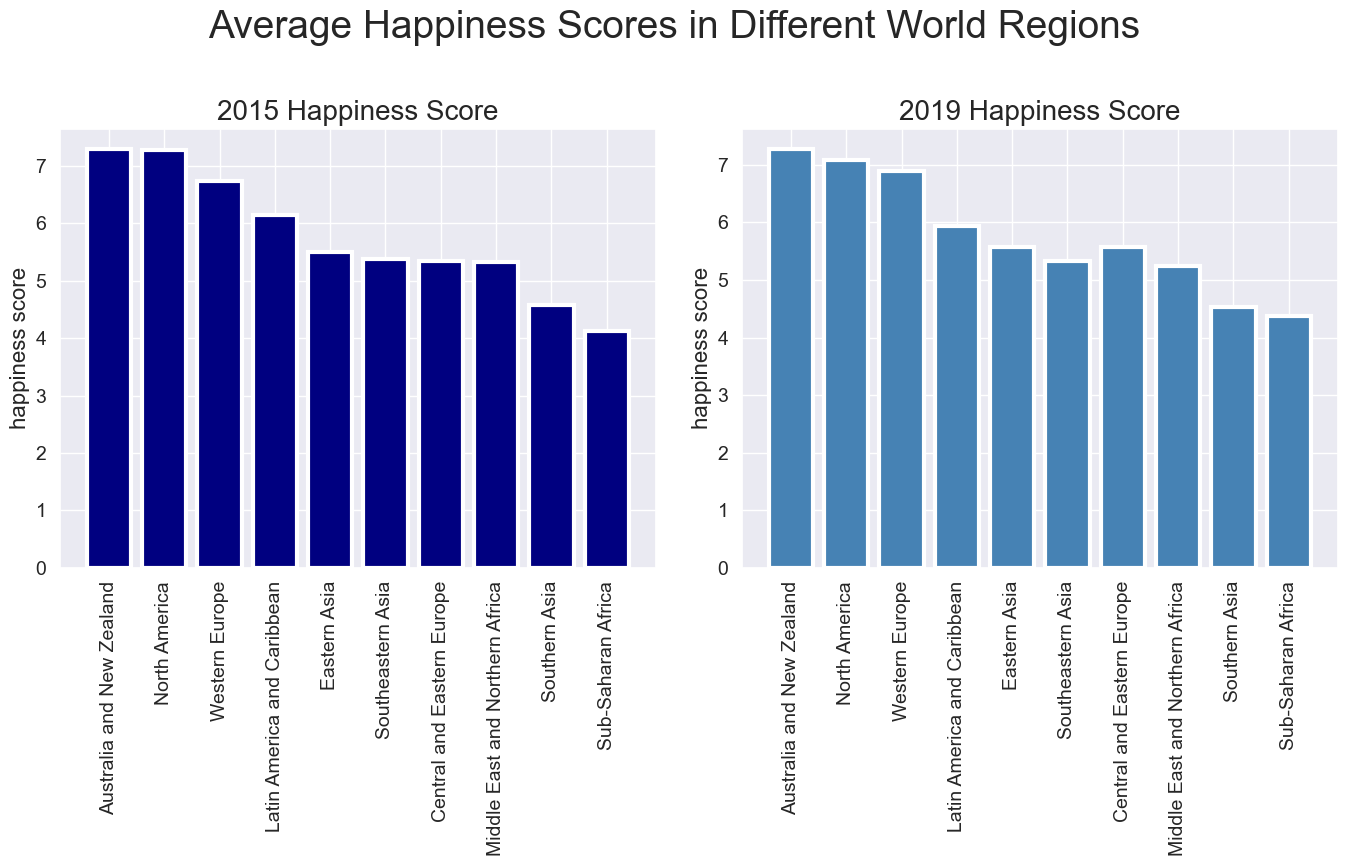

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,9))

ax1.bar(region_score['region'],region_score['mean2015'],color='navy',linewidth=3)
ax1.set_title('2015 Happiness Score',fontsize=20)
ax1.set_ylabel('happiness score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

ax2.bar(region_score['region'],region_score['mean2019'],color='steelblue',linewidth=3)
ax2.set_title('2019 Happiness Score',fontsize=20)
ax2.set_ylabel('happiness score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Average Happiness Scores in Different World Regions",fontsize=28)

plt.tight_layout()

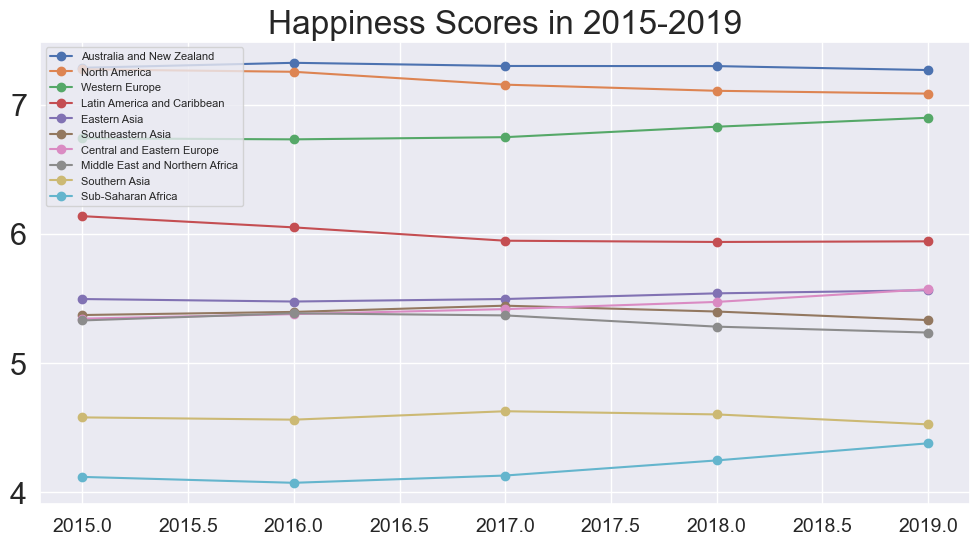

In [20]:
x = [2015,2016,2017,2018,2019]
y1 = [7.285000,7.323500,7.299000,7.298000,7.267500]
y2 = [7.273000,7.254000,7.154500,7.107000,7.085000]
y3 = [6.739350,6.731400,6.748400,6.829100,6.898400]
y4 = [6.137300,6.050500,5.947400,5.937750,5.942550]
y5 = [5.496250,5.477000,5.496500,5.540250,5.564250]
y6 = [5.372625,5.396750,5.444875,5.399750,5.333375]
y7 = [5.344571,5.379607,5.418321,5.473929,5.571786]
y8 = [5.330789,5.386053,5.369684,5.282737,5.237000]
y9 = [4.580857,4.563286,4.628429,4.603857,4.526857]
y10 = [4.120419,4.074839,4.131129,4.247968,4.380323]

plt.figure(figsize=(12,6))
plt.plot(x,y1,'-o',label='Australia and New Zealand')
plt.plot(x,y2,'-o',label='North America')
plt.plot(x,y3,'-o',label='Western Europe')
plt.plot(x,y4,'-o',label='Latin America and Caribbean')
plt.plot(x,y5,'-o',label='Eastern Asia')
plt.plot(x,y6,'-o',label='Southeastern Asia')
plt.plot(x,y7,'-o',label='Central and Eastern Europe')
plt.plot(x,y8,'-o',label='Middle East and Northern Africa')
plt.plot(x,y9,'-o',label='Southern Asia')
plt.plot(x,y10,'-o',label='Sub-Saharan Africa')

plt.title('Happiness Scores in 2015-2019')
plt.xticks(fontsize=14)
plt.legend(loc='upper left',fontsize=8);

In [21]:
data_scores['diff1519'] = data_scores['2019_score'] - data_scores['2015_score']

In [22]:
best_worst = data_scores[['country','region','diff1519']]
best_worst = best_worst.sort_values(by=['diff1519'],ascending=True)

best_worst.head()

country                       region  diff1519
21   Venezuela  Latin America and Caribbean    -2.103
78      Zambia           Sub-Saharan Africa    -1.022
102   Zimbabwe           Sub-Saharan Africa    -0.947
105      Haiti  Latin America and Caribbean    -0.921
116     Malawi           Sub-Saharan Africa    -0.882

In [23]:
best_worst = best_worst.sort_values(by=['diff1519'],ascending=False)

best_worst.head()

country                       region  diff1519
137         Benin           Sub-Saharan Africa     1.543
133   Ivory Coast           Sub-Saharan Africa     1.289
140          Togo           Sub-Saharan Africa     1.246
92       Honduras  Latin America and Caribbean     1.072
134  Burkina Faso           Sub-Saharan Africa     1.000

In [24]:
economy_scores = pd.DataFrame()
e16 = pd.DataFrame()
e17 = pd.DataFrame()
e18 = pd.DataFrame()
e19 = pd.DataFrame()

economy_scores[['country','region','2015_GDP_score','2015_score']] = data15[['Country','Region','Economy (GDP per Capita)','Happiness Score']]

e16[['country','2016_GDP_score','2016_score']] = data16[['Country','Economy (GDP per Capita)','Happiness Score']]
e17[['country','2017_GDP_score','2017_score']] = data17[['Country','Economy..GDP.per.Capita.','Happiness.Score']]
e18[['country','2018_GDP_score','2018_score']] = data18[['Country or region','GDP per capita','Score']]
e19[['country','2019_GDP_score','2019_score']] = data19[['Country or region','GDP per capita','Score']]

economy_scores = economy_scores.merge(e16,on=['country'])
economy_scores = economy_scores.merge(e17,on=['country'])
economy_scores = economy_scores.merge(e18,on=['country'])
economy_scores = economy_scores.merge(e19,on=['country'])

economy_scores.head()

country          region  2015_GDP_score  2015_score  2016_GDP_score  \
0  Switzerland  Western Europe         1.39651       7.587         1.52733   
1      Iceland  Western Europe         1.30232       7.561         1.42666   
2      Denmark  Western Europe         1.32548       7.527         1.44178   
3       Norway  Western Europe         1.45900       7.522         1.57744   
4       Canada   North America         1.32629       7.427         1.44015   

   2016_score  2017_GDP_score  2017_score  2018_GDP_score  2018_score  \
0       7.509        1.564980       7.494           1.420       7.487   
1       7.501        1.480633       7.504           1.343       7.495   
2       7.526        1.482383       7.522           1.351       7.555   
3       7.498        1.616463       7.537           1.456       7.594   
4       7.404        1.479204       7.316           1.330       7.328   

   2019_GDP_score  2019_score  
0           1.452       7.480  
1           1.380       7.494  
2           1.383       7.600  
3           1.488       7.554  
4           1.365       7.278

In [25]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = economy_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Greens',
            text = economy_scores['country'],
            z = economy_scores['2015_GDP_score'],
            colorbar = {'title':'GDP score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
gdp_map = gobj.Figure(data=[data])

gdp_map.update_layout(title_text = 'Economy (GDP) Score by Country (Year 2015)')

#plotting the map
iplot(gdp_map)

In [26]:
economy_region_score = economy_scores.groupby('region')['2015_GDP_score'].mean().reset_index(name='GDP2015').sort_values(['GDP2015'],ascending=False)
rscore16 = economy_scores.groupby('region')['2016_GDP_score'].mean().reset_index(name='GDP2016').sort_values(['GDP2016'],ascending=False)
rscore17 = economy_scores.groupby('region')['2017_GDP_score'].mean().reset_index(name='GDP2017').sort_values(['GDP2017'],ascending=False)
rscore18 = economy_scores.groupby('region')['2018_GDP_score'].mean().reset_index(name='GDP2018').sort_values(['GDP2018'],ascending=False)
rscore19 = economy_scores.groupby('region')['2019_GDP_score'].mean().reset_index(name='GDP2019').sort_values(['GDP2019'],ascending=False)

economy_region_score = economy_region_score.merge(rscore16,on=['region'])
economy_region_score = economy_region_score.merge(rscore17,on=['region'])
economy_region_score = economy_region_score.merge(rscore18,on=['region'])
economy_region_score = economy_region_score.merge(rscore19,on=['region'])
economy_region_score['diff GDP 2015-2019'] = economy_region_score['GDP2019'] - economy_region_score['GDP2015']

economy_region_score

region   GDP2015   GDP2016   GDP2017   GDP2018  \
0                    North America  1.360400  1.474055  1.512732  1.364000   
1                   Western Europe  1.303122  1.422338  1.462936  1.325650   
2        Australia and New Zealand  1.291880  1.402545  1.445060  1.304000   
3                     Eastern Asia  1.058415  1.188970  1.231749  1.115750   
4  Middle East and Northern Africa  1.051545  1.139323  1.168535  1.081158   
5       Central and Eastern Europe  0.943293  1.048545  1.093032  0.990429   
6      Latin America and Caribbean  0.854139  0.959183  0.994212  0.889950   
7                Southeastern Asia  0.813854  0.923376  0.965253  0.915750   
8                    Southern Asia  0.560486  0.660671  0.697479  0.625143   
9               Sub-Saharan Africa  0.381394  0.473830  0.513245  0.452613   

    GDP2019  diff GDP 2015-2019  
0  1.399000            0.038600  
1  1.362050            0.058928  
2  1.337500            0.045620  
3  1.151250            0.092835  
4  1.059053            0.007507  
5  1.022429            0.079136  
6  0.908950            0.054811  
7  0.950750            0.136896  
8  0.650286            0.089800  
9  0.466226            0.084832

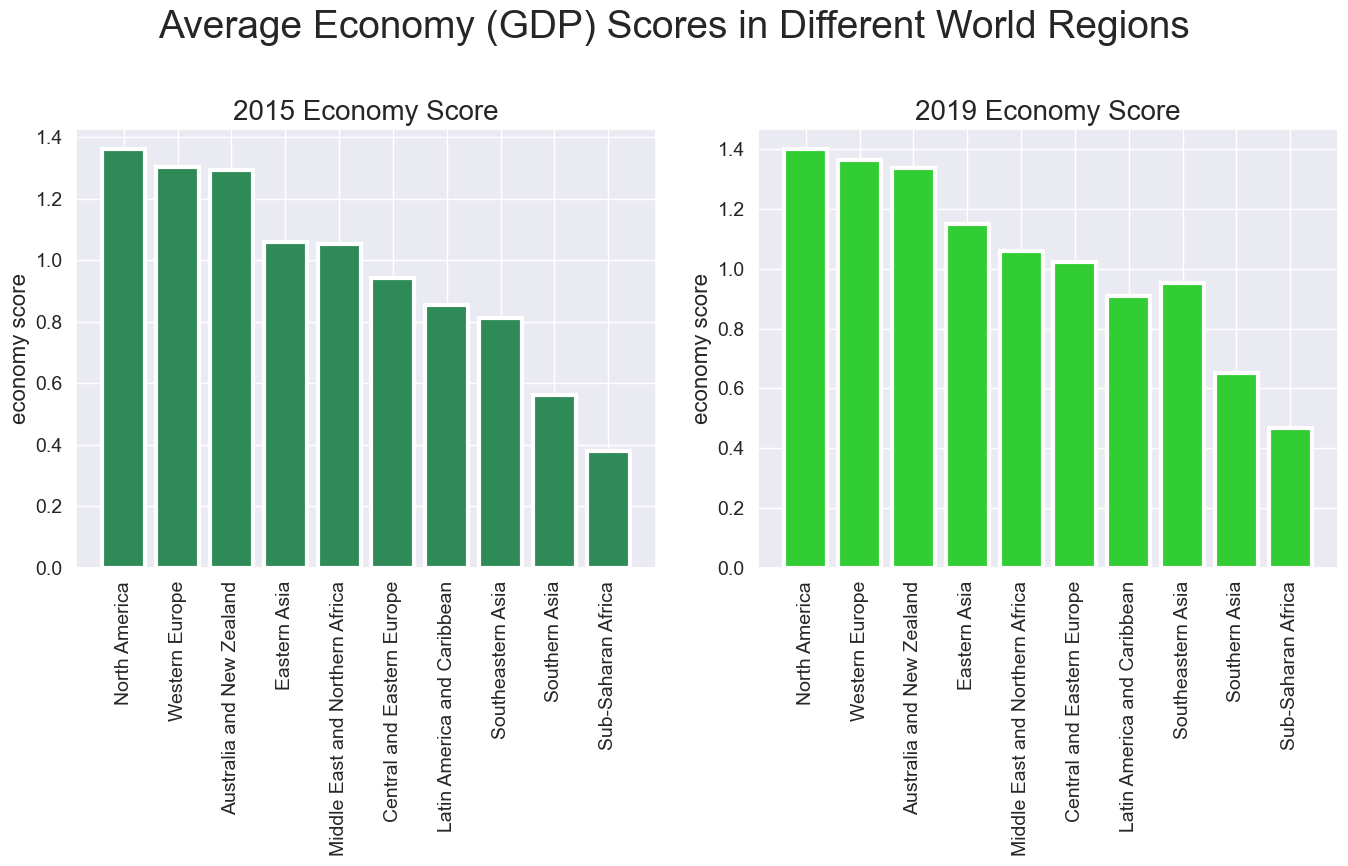

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,9))

ax1.bar(economy_region_score['region'],economy_region_score['GDP2015'],color='seagreen',linewidth=3)
ax1.set_title('2015 Economy Score',fontsize=20)
ax1.set_ylabel('economy score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

ax2.bar(economy_region_score['region'],economy_region_score['GDP2019'],color='limegreen',linewidth=3)
ax2.set_title('2019 Economy Score',fontsize=20)
ax2.set_ylabel('economy score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Average Economy (GDP) Scores in Different World Regions",fontsize=28)

plt.tight_layout()

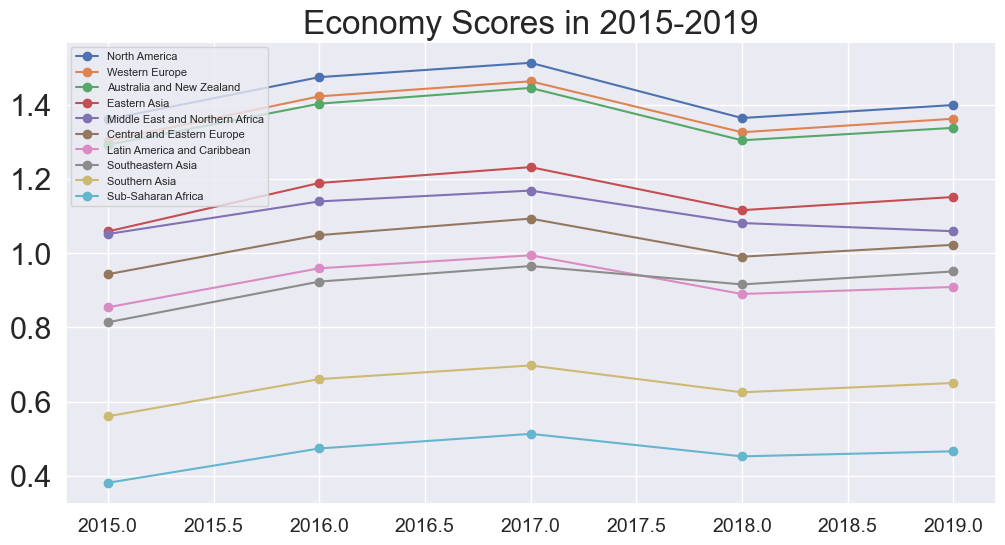

In [28]:
x = [2015,2016,2017,2018,2019]
y1 = [1.360400,1.474055,1.512732,1.364000,1.399000]
y2 = [1.303122,1.422338,1.462936,1.325650,1.362050]
y3 = [1.291880,1.402545,1.445060,1.304000,1.337500]
y4 = [1.058415,1.188970,1.231749,1.115750,1.151250]
y5 = [1.051545,1.139323,1.168535,1.081158,1.059053]
y6 = [0.943293,1.048545,1.093032,0.990429,1.022429]
y7 = [0.854139,0.959183,0.994212,0.889950,0.908950]
y8 = [0.813854,0.923376,0.965253,0.915750,0.950750]
y9 = [0.560486,0.660671,0.697479,0.625143,0.650286]
y10 = [0.381394,0.473830,0.513245,0.452613,0.466226]

plt.figure(figsize=(12,6))
plt.plot(x,y1,'-o',label='North America')
plt.plot(x,y2,'-o',label='Western Europe')
plt.plot(x,y3,'-o',label='Australia and New Zealand')
plt.plot(x,y4,'-o',label='Eastern Asia')
plt.plot(x,y5,'-o',label='Middle East and Northern Africa')
plt.plot(x,y6,'-o',label='Central and Eastern Europe')
plt.plot(x,y7,'-o',label='Latin America and Caribbean')          
plt.plot(x,y8,'-o',label='Southeastern Asia')
plt.plot(x,y9,'-o',label='Southern Asia')
plt.plot(x,y10,'-o',label='Sub-Saharan Africa')

plt.title('Economy Scores in 2015-2019')
plt.xticks(fontsize=14)
plt.legend(loc='upper left',fontsize=8);

In [29]:
health_scores = pd.DataFrame()
h16 = pd.DataFrame()
h17 = pd.DataFrame()
h18 = pd.DataFrame()
h19 = pd.DataFrame()

health_scores[['country','region','2015_health_score','2015_score']] = data15[['Country','Region','Health (Life Expectancy)','Happiness Score']]
h16[['country','2016_health_score','2016_score']] = data16[['Country','Health (Life Expectancy)','Happiness Score']]
h17[['country','2017_health_score','2017_score']] = data17[['Country','Health..Life.Expectancy.','Happiness.Score']]
h18[['country','2018_health_score','2018_score']] = data18[['Country or region','Healthy life expectancy','Score']]
h19[['country','2019_health_score','2019_score']] = data19[['Country or region','Healthy life expectancy','Score']]

health_scores = health_scores.merge(h16,on=['country'])
health_scores = health_scores.merge(h17,on=['country'])
health_scores = health_scores.merge(h18,on=['country'])
health_scores = health_scores.merge(h19,on=['country'])

health_scores.head(5)

country          region  2015_health_score  2015_score  \
0  Switzerland  Western Europe            0.94143       7.587   
1      Iceland  Western Europe            0.94784       7.561   
2      Denmark  Western Europe            0.87464       7.527   
3       Norway  Western Europe            0.88521       7.522   
4       Canada   North America            0.90563       7.427   

   2016_health_score  2016_score  2017_health_score  2017_score  \
0            0.86303       7.509           0.858131       7.494   
1            0.86733       7.501           0.833552       7.504   
2            0.79504       7.526           0.792566       7.522   
3            0.79579       7.498           0.796667       7.537   
4            0.82760       7.404           0.834558       7.316   

   2018_health_score  2018_score  2019_health_score  2019_score  
0              0.927       7.487              1.052       7.480  
1              0.914       7.495              1.026       7.494  
2              0.868       7.555              0.996       7.600  
3              0.861       7.594              1.028       7.554  
4              0.896       7.328              1.039       7.278

In [30]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = health_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Reds',
            text = health_scores['country'],
            z = health_scores['2015_health_score'],
            colorbar = {'title':'health score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
health_map = gobj.Figure(data=[data])

health_map.update_layout(title_text = 'Health Score by Country (Year 2015)')

#plotting the map
iplot(health_map)

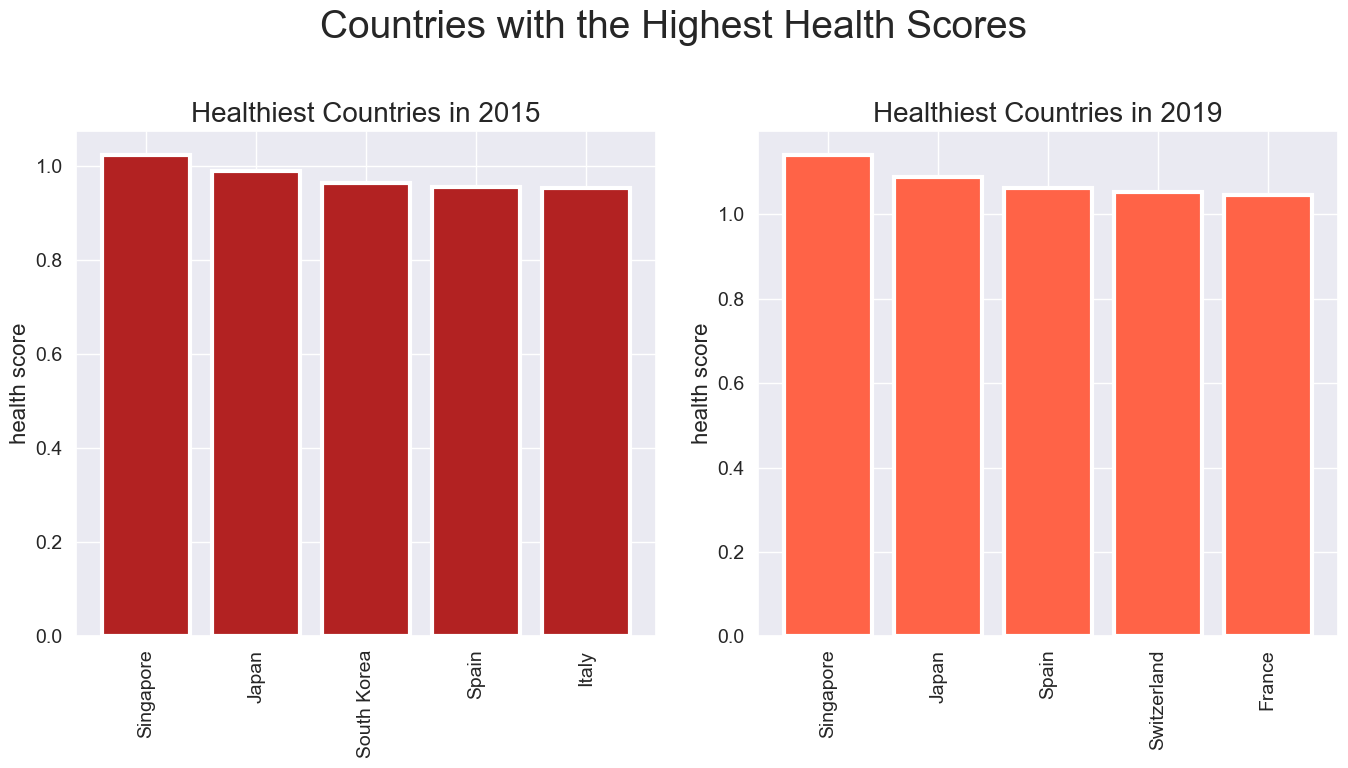

In [31]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,8))

health_scores15 = health_scores.copy().sort_values(by=['2015_health_score'],ascending=False).head()

ax1.bar(health_scores15['country'],health_scores15['2015_health_score'],color='firebrick',linewidth=3)
ax1.set_title('Healthiest Countries in 2015',fontsize=20)
ax1.set_ylabel('health score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

health_scores19 = health_scores.copy().sort_values(by=['2019_health_score'],ascending=False).head()

ax2.bar(health_scores19['country'],health_scores19['2019_health_score'],color='tomato',linewidth=3)
ax2.set_title('Healthiest Countries in 2019',fontsize=20)
ax2.set_ylabel('health score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Highest Health Scores",fontsize=28)

plt.tight_layout()

In [32]:
health_region_score = health_scores.groupby('region')['2015_health_score'].mean().reset_index(name='health2015').sort_values(['health2015'],ascending=False)
hscore16 = health_scores.groupby('region')['2016_health_score'].mean().reset_index(name='health2016').sort_values(['health2016'],ascending=False)
hscore17 = health_scores.groupby('region')['2017_health_score'].mean().reset_index(name='health2017').sort_values(['health2017'],ascending=False)
hscore18 = health_scores.groupby('region')['2018_health_score'].mean().reset_index(name='health2018').sort_values(['health2018'],ascending=False)
hscore19 = health_scores.groupby('region')['2019_health_score'].mean().reset_index(name='health2019').sort_values(['health2019'],ascending=False)

health_region_score = health_region_score.merge(hscore16,on=['region'])
health_region_score = health_region_score.merge(hscore17,on=['region'])
health_region_score = health_region_score.merge(hscore18,on=['region'])
health_region_score = health_region_score.merge(hscore19,on=['region'])

health_region_score

region  health2015  health2016  health2017  \
0        Australia and New Zealand    0.919965    0.841080    0.830323   
1                   Western Europe    0.908427    0.824971    0.824175   
2                    North America    0.883710    0.803300    0.804422   
3                     Eastern Asia    0.843938    0.772915    0.778222   
4       Central and Eastern Europe    0.718178    0.631028    0.635773   
5      Latin America and Caribbean    0.713106    0.621809    0.623601   
6  Middle East and Northern Africa    0.702608    0.616438    0.605980   
7                Southeastern Asia    0.693390    0.583676    0.581918   
8                    Southern Asia    0.540830    0.453670    0.456658   
9               Sub-Saharan Africa    0.299445    0.242479    0.247857   

   health2018  health2019  
0    0.893000    1.031000  
1    0.895800    1.013850  
2    0.857500    0.956500  
3    0.829250    0.921000  
4    0.686536    0.808500  
5    0.666250    0.816800  
6    0.646632    0.751053  
7    0.625875    0.769625  
8    0.497286    0.617000  
9    0.279484    0.440839

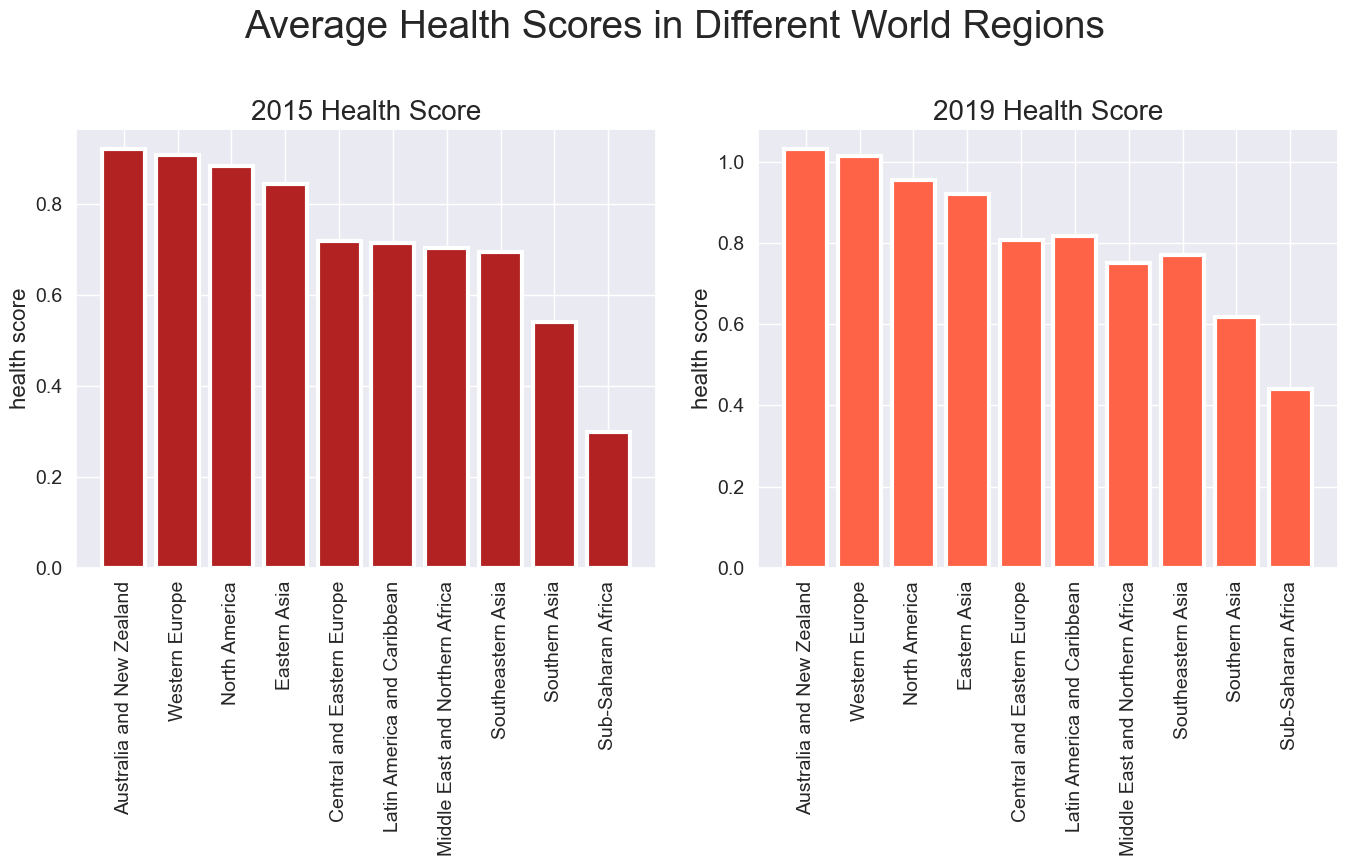

In [33]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,9))

ax1.bar(health_region_score['region'],health_region_score['health2015'],color='firebrick',linewidth=3)
ax1.set_title('2015 Health Score',fontsize=20)
ax1.set_ylabel('health score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

ax2.bar(health_region_score['region'],health_region_score['health2019'],color='tomato',linewidth=3)
ax2.set_title('2019 Health Score',fontsize=20)
ax2.set_ylabel('health score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Average Health Scores in Different World Regions",fontsize=28)

plt.tight_layout()


In [34]:
health_scores_europe = health_scores[(health_scores['region'] == 'Western Europe') | (health_scores['region'] == 'Central and Eastern Europe')]

#Initializing the data variable
data = dict(type = 'choropleth',
            locations = health_scores_europe['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Reds',
            text = health_scores_europe['country'],
            z = health_scores_europe['2019_health_score'],
            colorbar = {'title':'health score','len':0.75,'lenmode':'fraction'})

#Initializing the layout variable
layout = dict(geo=dict(scope='europe'))

#Initializing the object for graph_objs.Figure class
health_europe = gobj.Figure(data=[data],layout=layout)

health_europe.update_layout(title_text = 'Health Score in Europe (Year 2019)')

#plotting the map
iplot(health_europe)

In [35]:
freedom_scores = pd.DataFrame()
f16 = pd.DataFrame()
f17 = pd.DataFrame()
f18 = pd.DataFrame()
f19 = pd.DataFrame()

freedom_scores[['country','region','2015_freedom_score','2015_score']] = data15[['Country','Region','Freedom','Happiness Score']]

f16[['country','2016_freedom_score','2016_score']] = data16[['Country','Freedom','Happiness Score']]
f17[['country','2017_freedom_score','2017_score']] = data17[['Country','Freedom','Happiness.Score']]
f18[['country','2018_freedom_score','2018_score']] = data18[['Country or region','Freedom to make life choices','Score']]
f19[['country','2019_freedom_score','2019_score']] = data19[['Country or region','Freedom to make life choices','Score']]

freedom_scores = freedom_scores.merge(f16,on=['country'])
freedom_scores = freedom_scores.merge(f17,on=['country'])
freedom_scores = freedom_scores.merge(f18,on=['country'])
freedom_scores = freedom_scores.merge(f19,on=['country'])

freedom_scores.head()

country          region  2015_freedom_score  2015_score  \
0  Switzerland  Western Europe             0.66557       7.587   
1      Iceland  Western Europe             0.62877       7.561   
2      Denmark  Western Europe             0.64938       7.527   
3       Norway  Western Europe             0.66973       7.522   
4       Canada   North America             0.63297       7.427   

   2016_freedom_score  2016_score  2017_freedom_score  2017_score  \
0             0.58557       7.509            0.620071       7.494   
1             0.56624       7.501            0.627163       7.504   
2             0.57941       7.526            0.626007       7.522   
3             0.59609       7.498            0.635423       7.537   
4             0.57370       7.404            0.611101       7.316   

   2018_freedom_score  2018_score  2019_freedom_score  2019_score  
0               0.660       7.487               0.572       7.480  
1               0.677       7.495               0.591       7.494  
2               0.683       7.555               0.592       7.600  
3               0.686       7.594               0.603       7.554  
4               0.653       7.328               0.584       7.278

In [36]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = freedom_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Greys',
            text = freedom_scores['country'],
            z = freedom_scores['2015_freedom_score'],
            colorbar = {'title':'freedom score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
freedom_map = gobj.Figure(data=[data])

freedom_map.update_layout(title_text = 'Freedom Score by Country (Year 2015)')

#plotting the map
iplot(freedom_map)

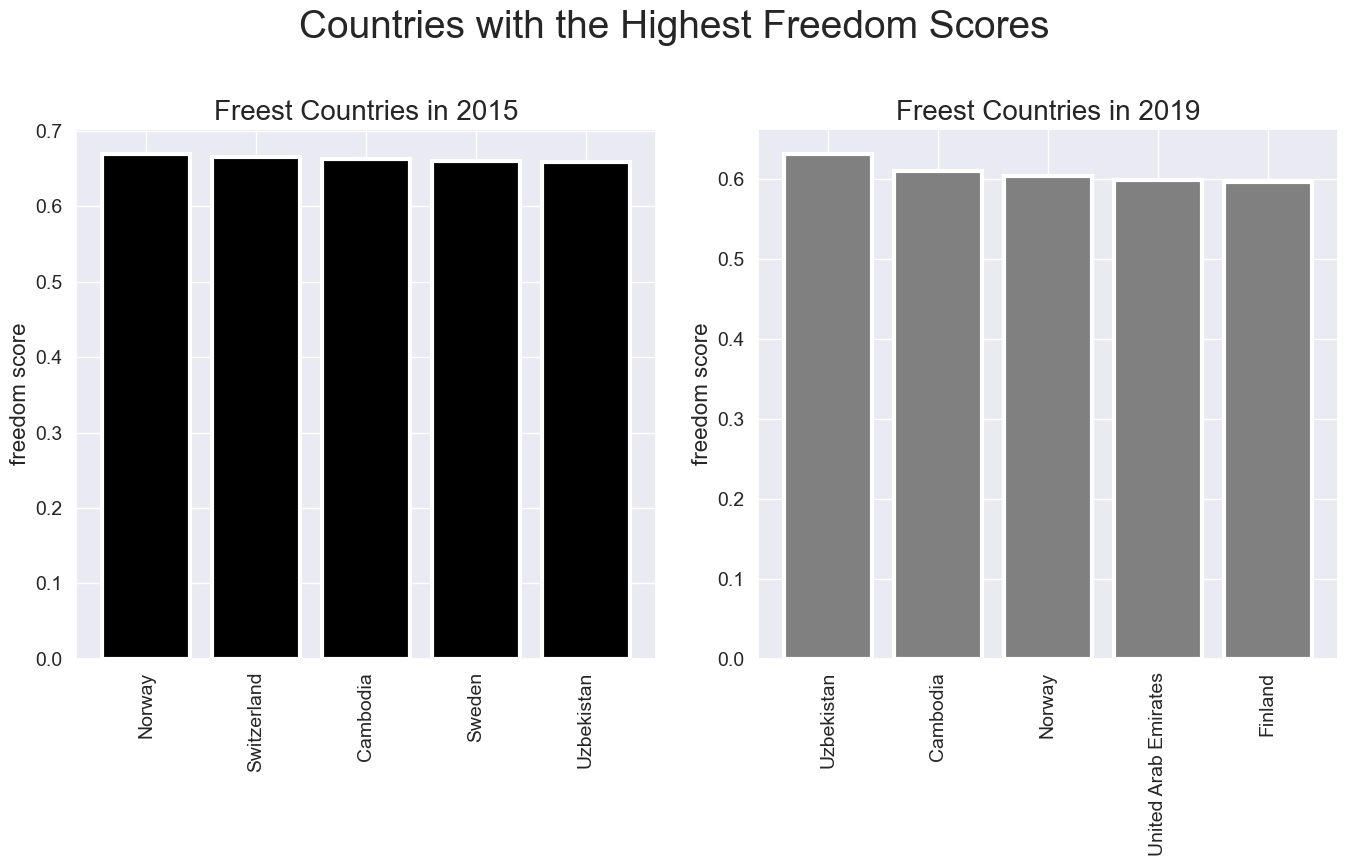

In [37]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,9))

freedom_scores15 = freedom_scores.copy().sort_values(by=['2015_freedom_score'],ascending=False).head()

ax1.bar(freedom_scores15['country'],freedom_scores15['2015_freedom_score'],color='black',linewidth=3)
ax1.set_title('Freest Countries in 2015',fontsize=20)
ax1.set_ylabel('freedom score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

freedom_scores19 = freedom_scores.copy().sort_values(by=['2019_freedom_score'],ascending=False).head()

ax2.bar(freedom_scores19['country'],freedom_scores19['2019_freedom_score'],color='grey',linewidth=3)
ax2.set_title('Freest Countries in 2019',fontsize=20)
ax2.set_ylabel('freedom score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Highest Freedom Scores",fontsize=28)

plt.tight_layout()

In [38]:
generosity_scores = pd.DataFrame()
g16 = pd.DataFrame()
g17 = pd.DataFrame()
g18 = pd.DataFrame()
g19 = pd.DataFrame()

generosity_scores[['country','region','2015_generosity_score','2015_score']] = data15[['Country','Region','Generosity','Happiness Score']]

g16[['country','2016_generosity_score','2016_score']] = data16[['Country','Generosity','Happiness Score']]
g17[['country','2017_generosity_score','2017_score']] = data17[['Country','Generosity','Happiness.Score']]
g18[['country','2018_generosity_score','2018_score']] = data18[['Country or region','Generosity','Score']]
g19[['country','2019_generosity_score','2019_score']] = data19[['Country or region','Generosity','Score']]

generosity_scores = generosity_scores.merge(g16,on=['country'])
generosity_scores = generosity_scores.merge(g17,on=['country'])
generosity_scores = generosity_scores.merge(g18,on=['country'])
generosity_scores = generosity_scores.merge(g19,on=['country'])

generosity_scores.head()

country          region  2015_generosity_score  2015_score  \
0  Switzerland  Western Europe                0.29678       7.587   
1      Iceland  Western Europe                0.43630       7.561   
2      Denmark  Western Europe                0.34139       7.527   
3       Norway  Western Europe                0.34699       7.522   
4       Canada   North America                0.45811       7.427   

   2016_generosity_score  2016_score  2017_generosity_score  2017_score  \
0                0.28083       7.509               0.290549       7.494   
1                0.47678       7.501               0.475540       7.504   
2                0.36171       7.526               0.355280       7.522   
3                0.37895       7.498               0.362012       7.537   
4                0.44834       7.404               0.435540       7.316   

   2018_generosity_score  2018_score  2019_generosity_score  2019_score  
0                  0.256       7.487                  0.263       7.480  
1                  0.353       7.495                  0.354       7.494  
2                  0.284       7.555                  0.252       7.600  
3                  0.286       7.594                  0.271       7.554  
4                  0.321       7.328                  0.285       7.278

In [39]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = generosity_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Oranges',
            text = generosity_scores['country'],
            z = generosity_scores['2019_generosity_score'],
            colorbar = {'title':'generosity score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
generosity_map = gobj.Figure(data=[data])

generosity_map.update_layout(title_text = 'Generosity Score by Country (Year 2019)')

#plotting the map
iplot(generosity_map)

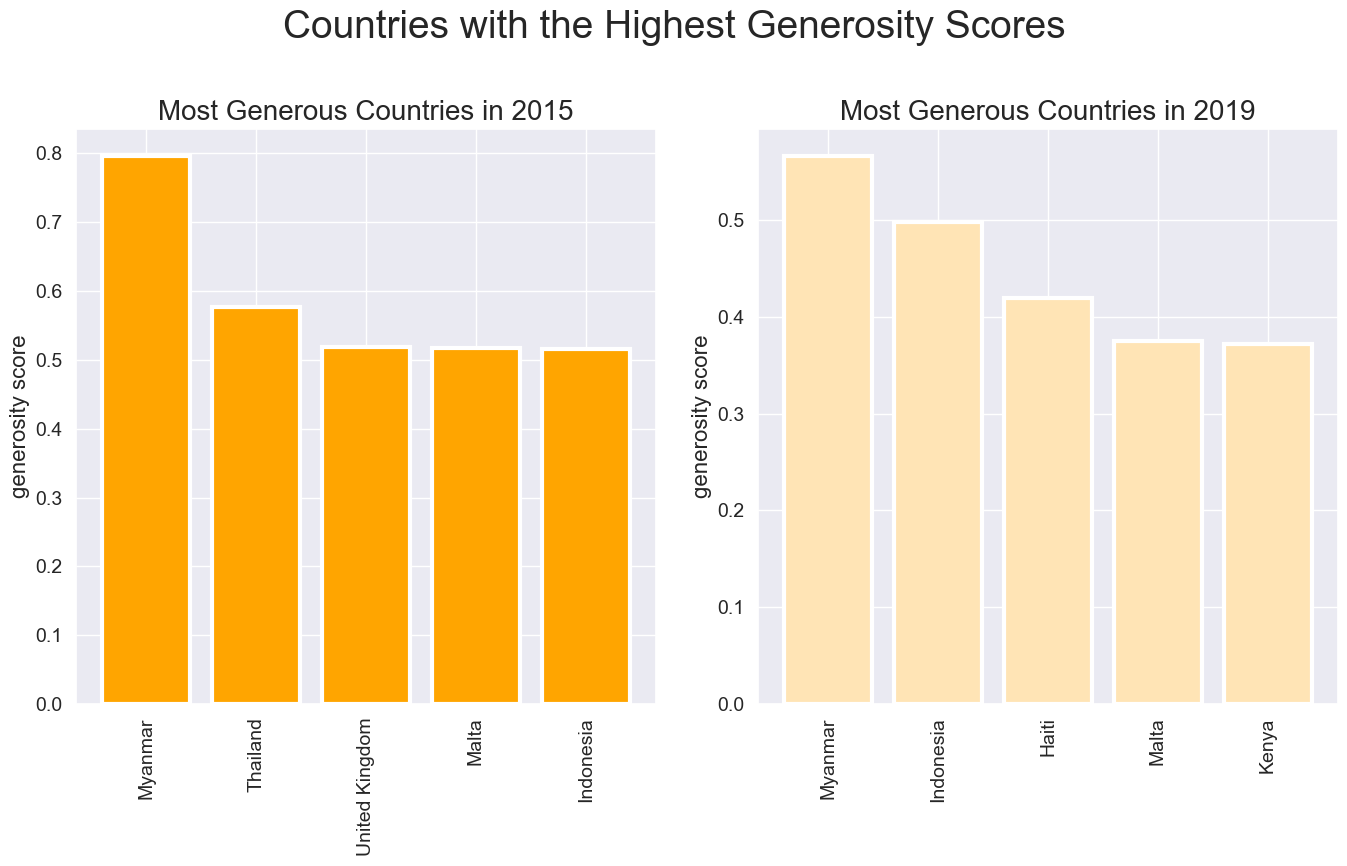

In [40]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,9))

generosity_scores15 = generosity_scores.copy().sort_values(by=['2015_generosity_score'],ascending=False).head()

ax1.bar(generosity_scores15['country'],generosity_scores15['2015_generosity_score'],color='orange',linewidth=3)
ax1.set_title('Most Generous Countries in 2015',fontsize=20)
ax1.set_ylabel('generosity score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

generosity_scores19 = generosity_scores.copy().sort_values(by=['2019_generosity_score'],ascending=False).head()

ax2.bar(generosity_scores19['country'],generosity_scores19['2019_generosity_score'],color='moccasin',linewidth=3)
ax2.set_title('Most Generous Countries in 2019',fontsize=20)
ax2.set_ylabel('generosity score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Highest Generosity Scores",fontsize=28)

plt.tight_layout()

In [41]:
social_scores = pd.DataFrame()
s16 = pd.DataFrame()
s17 = pd.DataFrame()
s18 = pd.DataFrame()
s19 = pd.DataFrame()

social_scores[['country','region','2015_social_score','2015_score']] = data15[['Country','Region','Family','Happiness Score']]
s16[['country','2016_social_score','2016_score']] = data16[['Country','Family','Happiness Score']]
s17[['country','2017_social_score','2017_score']] = data17[['Country','Family','Happiness.Score']]
s18[['country','2018_social_score','2018_score']] = data18[['Country or region','Social support','Score']]
s19[['country','2019_social_score','2019_score']] = data19[['Country or region','Social support','Score']]

social_scores = social_scores.merge(s16,on=['country'])
social_scores = social_scores.merge(s17,on=['country'])
social_scores = social_scores.merge(s18,on=['country'])
social_scores = social_scores.merge(s19,on=['country'])

social_scores.head(5)

country          region  2015_social_score  2015_score  \
0  Switzerland  Western Europe            1.34951       7.587   
1      Iceland  Western Europe            1.40223       7.561   
2      Denmark  Western Europe            1.36058       7.527   
3       Norway  Western Europe            1.33095       7.522   
4       Canada   North America            1.32261       7.427   

   2016_social_score  2016_score  2017_social_score  2017_score  \
0            1.14524       7.509           1.516912       7.494   
1            1.18326       7.501           1.610574       7.504   
2            1.16374       7.526           1.551122       7.522   
3            1.12690       7.498           1.533524       7.537   
4            1.09610       7.404           1.481349       7.316   

   2018_social_score  2018_score  2019_social_score  2019_score  
0              1.549       7.487              1.526       7.480  
1              1.644       7.495              1.624       7.494  
2              1.590       7.555              1.573       7.600  
3              1.582       7.594              1.582       7.554  
4              1.532       7.328              1.505       7.278

In [42]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = social_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = "Cividis",
            text = social_scores['country'],
            z = social_scores['2015_social_score'],
            colorbar = {'title':'social support score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
social_map = gobj.Figure(data=[data])

social_map.update_layout(title_text = 'Social Support Score by Country (Year 2015)')

#plotting the map
iplot(social_map)

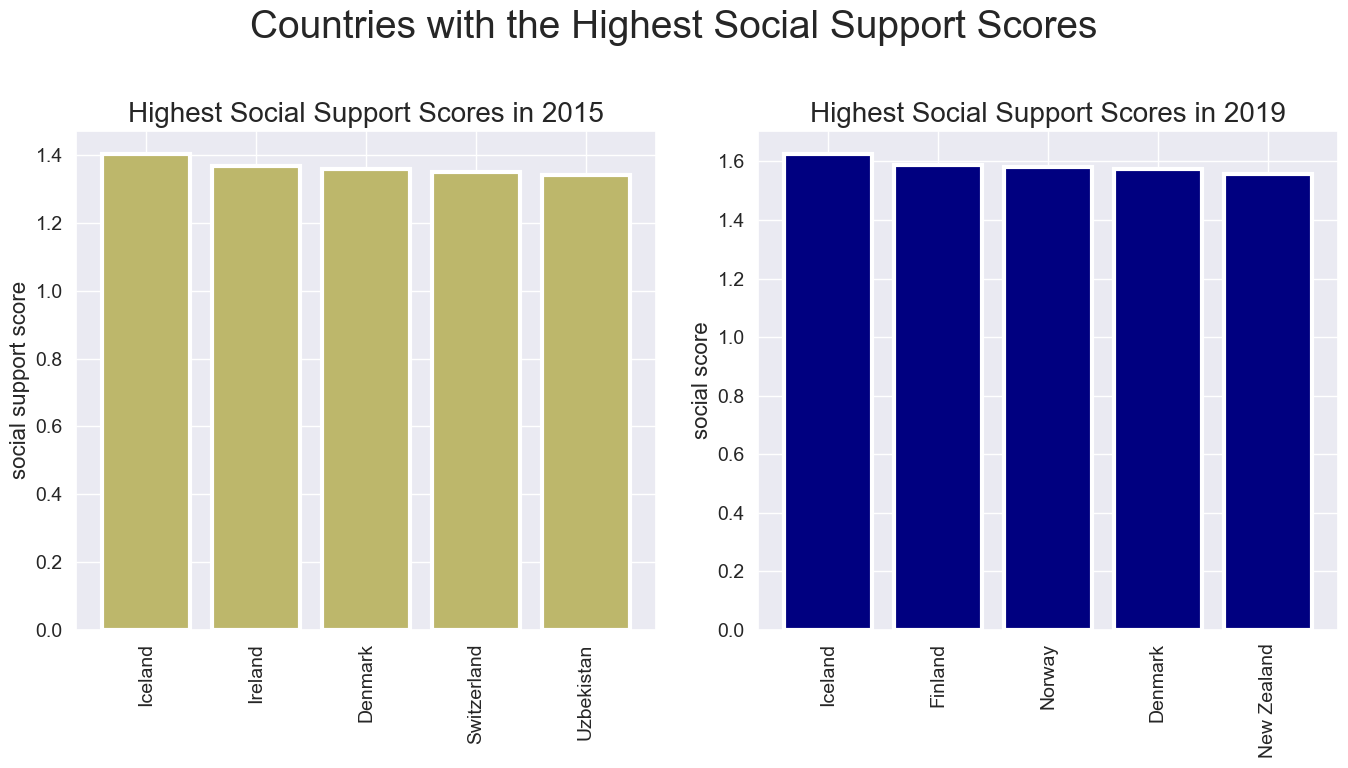

In [43]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,8))

social_scores15 = social_scores.copy().sort_values(by=['2015_social_score'],ascending=False).head()

ax1.bar(social_scores15['country'],social_scores15['2015_social_score'],color='darkkhaki',linewidth=3)
ax1.set_title('Highest Social Support Scores in 2015',fontsize=20)
ax1.set_ylabel('social support score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

social_scores19 = social_scores.copy().sort_values(by=['2019_social_score'],ascending=False).head()

ax2.bar(social_scores19['country'],social_scores19['2019_social_score'],color='navy',linewidth=3)
ax2.set_title('Highest Social Support Scores in 2019',fontsize=20)
ax2.set_ylabel('social score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Highest Social Support Scores",fontsize=28)

plt.tight_layout()

In [44]:
social_region_score = social_scores.groupby('region')['2015_social_score'].mean().reset_index(name='social2015').sort_values(['social2015'],ascending=False)
sscore16 = social_scores.groupby('region')['2016_social_score'].mean().reset_index(name='social2016').sort_values(['social2016'],ascending=False)
sscore17 = social_scores.groupby('region')['2017_social_score'].mean().reset_index(name='social2017').sort_values(['social2017'],ascending=False)
sscore18 = social_scores.groupby('region')['2018_social_score'].mean().reset_index(name='social2018').sort_values(['social2018'],ascending=False)
sscore19 = social_scores.groupby('region')['2019_social_score'].mean().reset_index(name='social2019').sort_values(['social2019'],ascending=False)

social_region_score = social_region_score.merge(sscore16,on=['region'])
social_region_score = social_region_score.merge(sscore17,on=['region'])
social_region_score = social_region_score.merge(sscore18,on=['region'])
social_region_score = social_region_score.merge(sscore19,on=['region'])

social_region_score

region  social2015  social2016  social2017  \
0        Australia and New Zealand    1.314450    1.138770    1.529119   
1                    North America    1.284860    1.071960    1.450635   
2                   Western Europe    1.256163    1.053662    1.457878   
3                     Eastern Asia    1.115552    0.916530    1.304615   
4      Latin America and Caribbean    1.107415    0.901517    1.296089   
5       Central and Eastern Europe    1.054854    0.864694    1.284942   
6                Southeastern Asia    0.965773    0.822013    1.249948   
7  Middle East and Northern Africa    0.911999    0.695644    1.095511   
8               Sub-Saharan Africa    0.806855    0.596425    0.980731   
9                    Southern Asia    0.645321    0.480694    0.931875   

   social2018  social2019  
0    1.587000    1.552500  
1    1.501500    1.481000  
2    1.489750    1.483900  
3    1.331250    1.323500  
4    1.339200    1.332850  
5    1.328964    1.340393  
6    1.285000    1.273500  
7    1.110842    1.148684  
8    0.963871    0.938097  
9    0.974429    0.986857

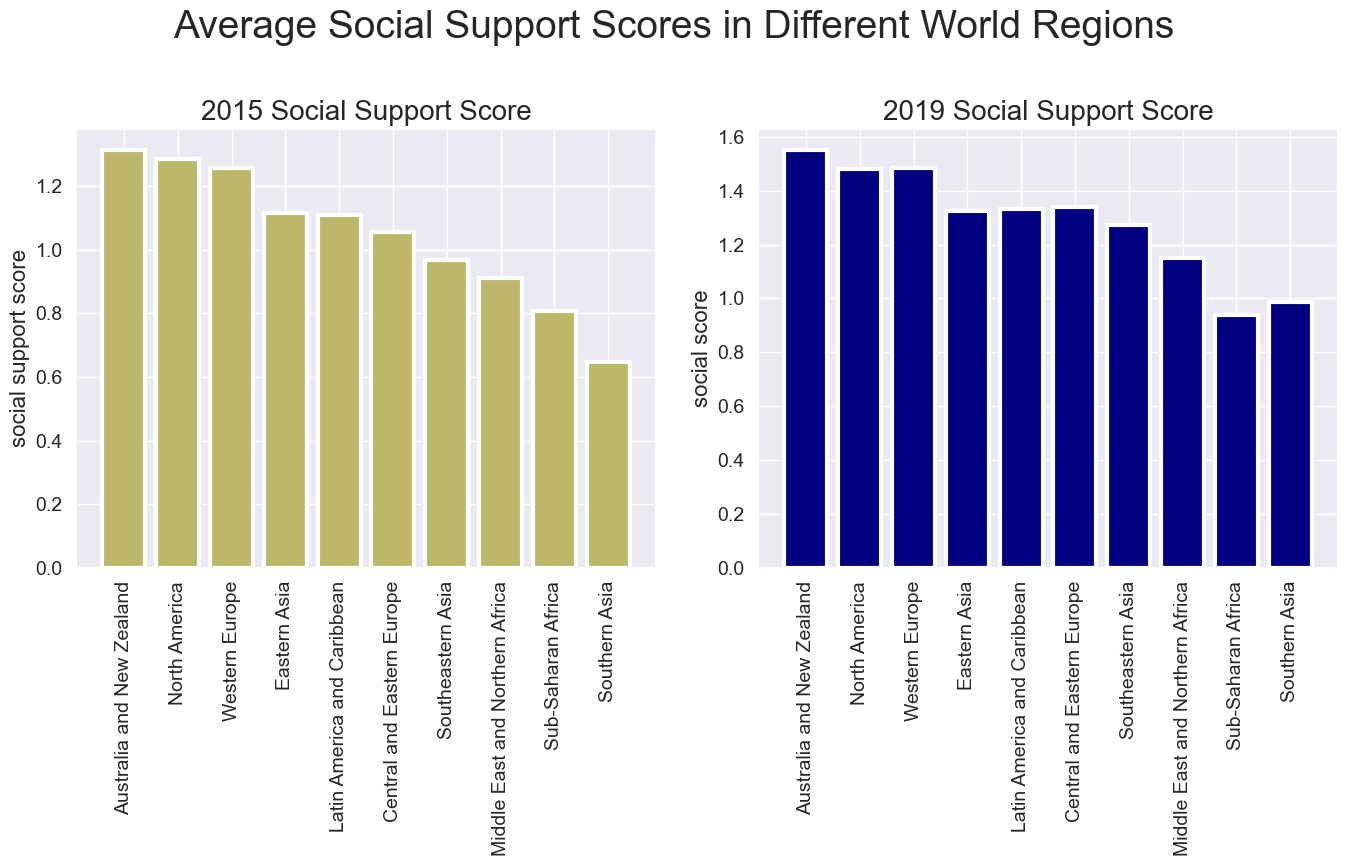

In [45]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,9))

ax1.bar(social_region_score['region'],social_region_score['social2015'],color='darkkhaki',linewidth=3)
ax1.set_title('2015 Social Support Score',fontsize=20)
ax1.set_ylabel('social support score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

ax2.bar(social_region_score['region'],social_region_score['social2019'],color='navy',linewidth=3)
ax2.set_title('2019 Social Support Score',fontsize=20)
ax2.set_ylabel('social score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Average Social Support Scores in Different World Regions",fontsize=28)

plt.tight_layout()

In [46]:
trust_scores = pd.DataFrame()
t16 = pd.DataFrame()
t17 = pd.DataFrame()
t18 = pd.DataFrame()
t19 = pd.DataFrame()

trust_scores[['country','region','2015_trust_score','2015_score']] = data15[['Country','Region','Trust (Government Corruption)','Happiness Score']]
t16[['country','2016_trust_score','2016_score']] = data16[['Country','Trust (Government Corruption)','Happiness Score']]
t17[['country','2017_trust_score','2017_score']] = data17[['Country','Trust..Government.Corruption.','Happiness.Score']]
t18[['country','2018_trust_score','2018_score']] = data18[['Country or region','Perceptions of corruption','Score']]
t19[['country','2019_trust_score','2019_score']] = data19[['Country or region','Perceptions of corruption','Score']]

trust_scores = trust_scores.merge(t16,on=['country'])
trust_scores = trust_scores.merge(t17,on=['country'])
trust_scores = trust_scores.merge(t18,on=['country'])
trust_scores = trust_scores.merge(t19,on=['country'])

trust_scores.head(5)

country          region  2015_trust_score  2015_score  \
0  Switzerland  Western Europe           0.41978       7.587   
1      Iceland  Western Europe           0.14145       7.561   
2      Denmark  Western Europe           0.48357       7.527   
3       Norway  Western Europe           0.36503       7.522   
4       Canada   North America           0.32957       7.427   

   2016_trust_score  2016_score  2017_trust_score  2017_score  \
0           0.41203       7.509          0.367007       7.494   
1           0.14975       7.501          0.153527       7.504   
2           0.44453       7.526          0.400770       7.522   
3           0.35776       7.498          0.315964       7.537   
4           0.31329       7.404          0.287372       7.316   

   2018_trust_score  2018_score  2019_trust_score  2019_score  
0             0.357       7.487             0.343       7.480  
1             0.138       7.495             0.118       7.494  
2             0.408       7.555             0.410       7.600  
3             0.340       7.594             0.341       7.554  
4             0.291       7.328             0.308       7.278

In [47]:
#Initializing the data variable
data = dict(type = 'choropleth',
            locations = trust_scores['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'viridis',
            text = trust_scores['country'],
            z = trust_scores['2015_trust_score'],
            colorbar = {'title':'trust score','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
trust_map = gobj.Figure(data=[data])

trust_map.update_layout(title_text = 'Trust Score by Country (Year 2015)')

#plotting the map
iplot(trust_map)

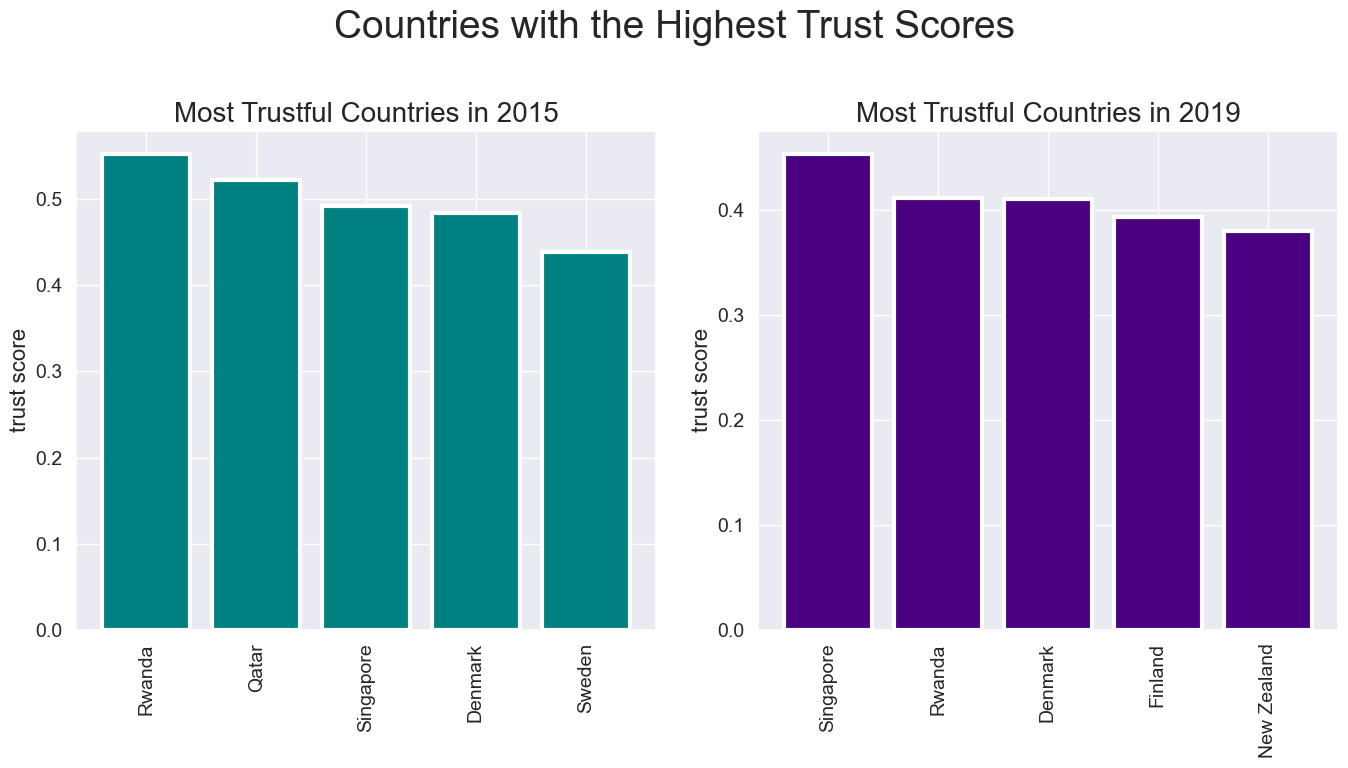

In [48]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,8))

trust_scores15 = trust_scores.copy().sort_values(by=['2015_trust_score'],ascending=False).head()

ax1.bar(trust_scores15['country'],trust_scores15['2015_trust_score'],color='teal',linewidth=3)
ax1.set_title('Most Trustful Countries in 2015',fontsize=20)
ax1.set_ylabel('trust score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

trust_scores19 = trust_scores.copy().sort_values(by=['2019_trust_score'],ascending=False).head()

ax2.bar(trust_scores19['country'],trust_scores19['2019_trust_score'],color='indigo',linewidth=3)
ax2.set_title('Most Trustful Countries in 2019',fontsize=20)
ax2.set_ylabel('trust score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Highest Trust Scores",fontsize=28)

plt.tight_layout()

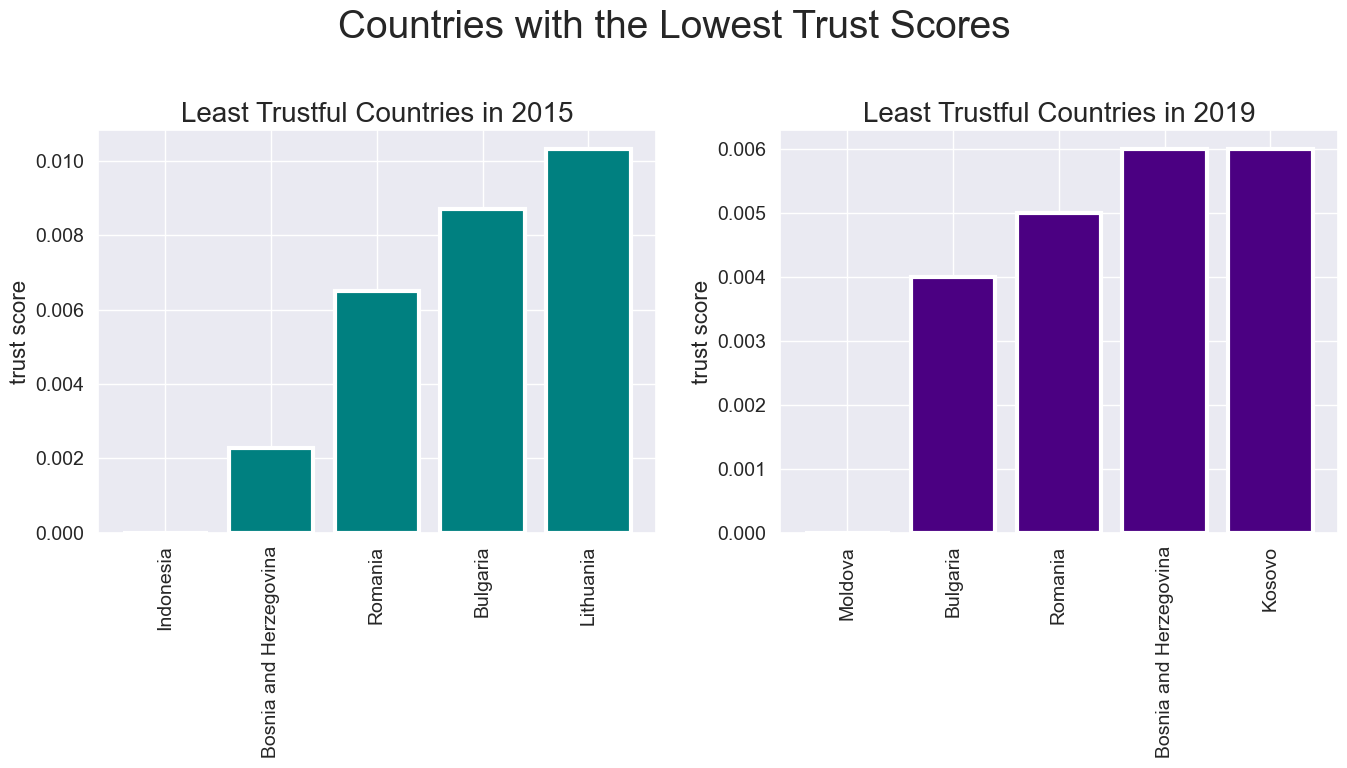

In [49]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,8))

trust_scores15 = trust_scores.copy().sort_values(by=['2015_trust_score'],ascending=True).head()

ax1.bar(trust_scores15['country'],trust_scores15['2015_trust_score'],color='teal',linewidth=3)
ax1.set_title('Least Trustful Countries in 2015',fontsize=20)
ax1.set_ylabel('trust score',fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.xaxis.set_tick_params(labelsize=14)

trust_scores19 = trust_scores.copy().sort_values(by=['2019_trust_score'],ascending=True).head()

ax2.bar(trust_scores19['country'],trust_scores19['2019_trust_score'],color='indigo',linewidth=3)
ax2.set_title('Least Trustful Countries in 2019',fontsize=20)
ax2.set_ylabel('trust score',fontsize=16)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.xaxis.set_tick_params(labelsize=14)

fig.suptitle("Countries with the Lowest Trust Scores",fontsize=28)

plt.tight_layout()

In [50]:
trust_scores[trust_scores['country'] == 'Indonesia']

country             region  2015_trust_score  2015_score  \
67  Indonesia  Southeastern Asia               0.0       5.399   

    2016_trust_score  2016_score  2017_trust_score  2017_score  \
67           0.00322       5.314          0.015317       5.262   

    2018_trust_score  2018_score  2019_trust_score  2019_score  
67             0.018       5.093             0.028       5.192

In [51]:
trust_scores[trust_scores['country'] == 'Moldova']

country                      region  2015_trust_score  2015_score  \
47  Moldova  Central and Eastern Europe           0.01615       5.889   

    2016_trust_score  2016_score  2017_trust_score  2017_score  \
47           0.01903       5.897          0.010091       5.838   

    2018_trust_score  2018_score  2019_trust_score  2019_score  
47               0.0        5.64               0.0       5.529

In [52]:
data15.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

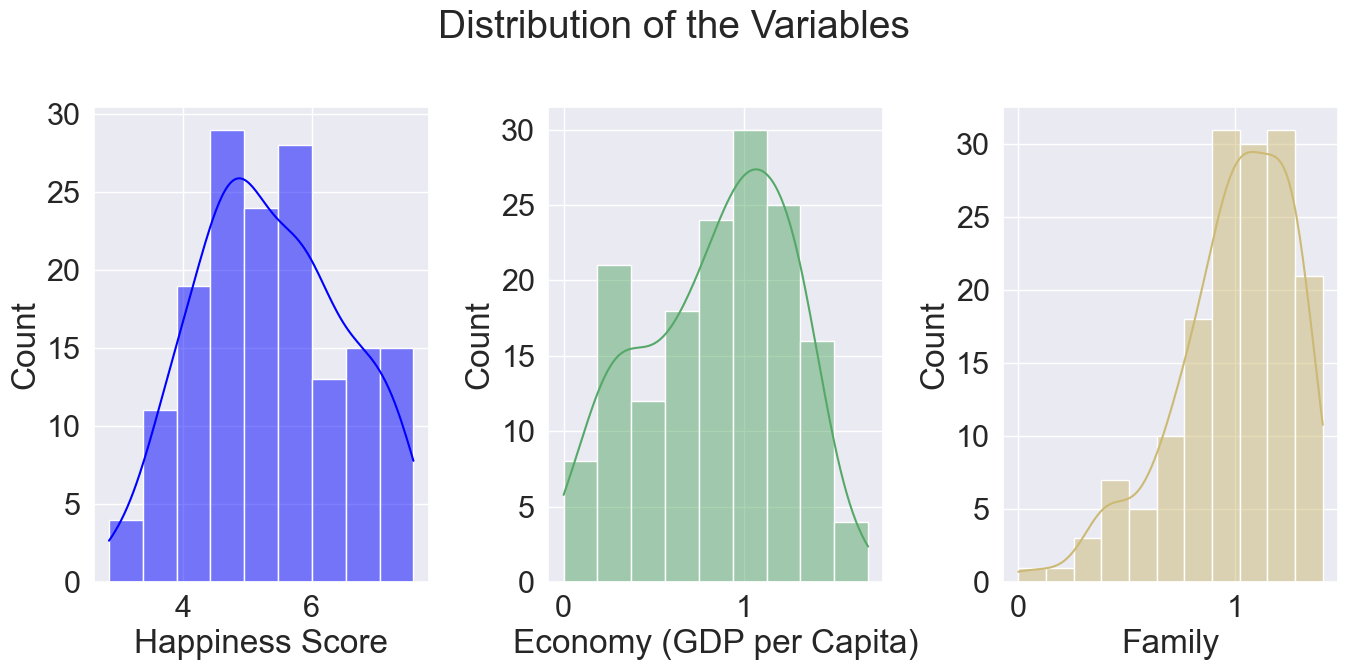

In [53]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,7))

ax1 = sns.histplot(data15['Happiness Score'],kde=True,color='blue',ax=ax1) 
ax2 = sns.histplot(data15['Economy (GDP per Capita)'],kde=True,color='g',ax=ax2) 
ax3 = sns.histplot(data15['Family'],kde=True,color='y',ax=ax3) 

fig.suptitle("Distribution of the Variables",fontsize=28)

plt.tight_layout()

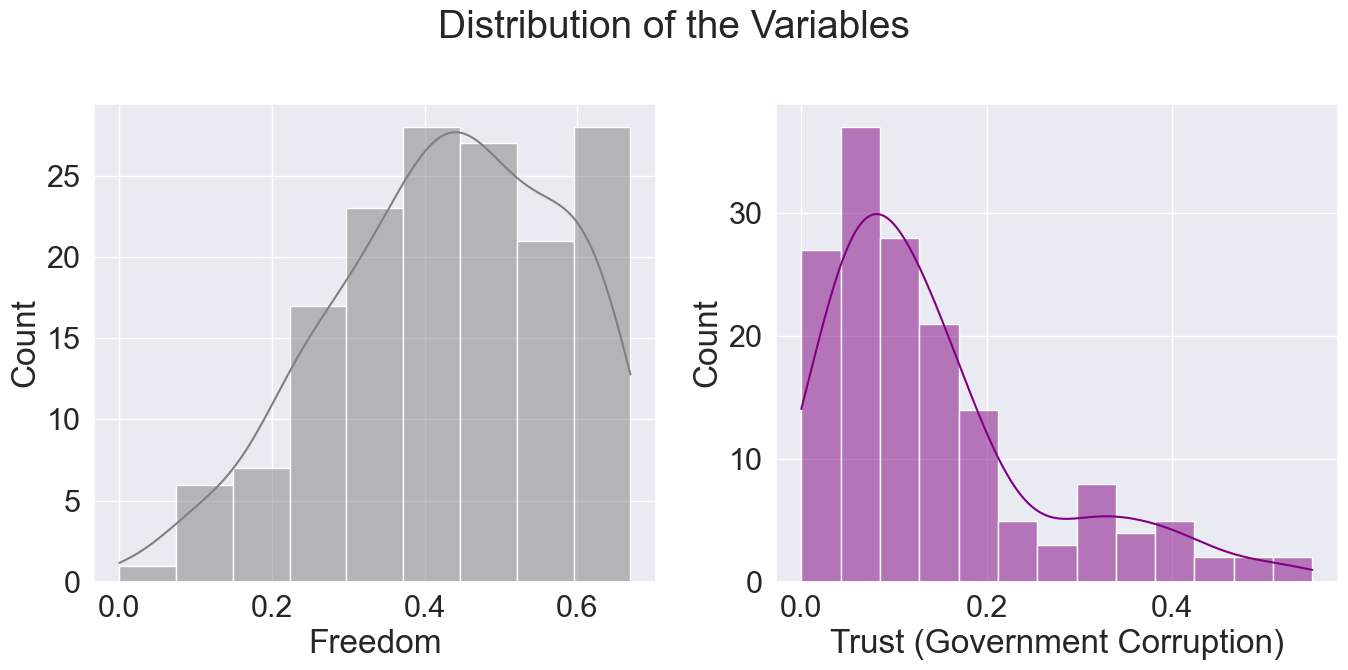

In [54]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,7))

ax1 = sns.histplot(data15['Freedom'],kde=True,color='grey',ax=ax1) 
ax2 = sns.histplot(data15['Trust (Government Corruption)'],kde=True,color='purple',ax=ax2) 

fig.suptitle("Distribution of the Variables",fontsize=28)

plt.tight_layout()

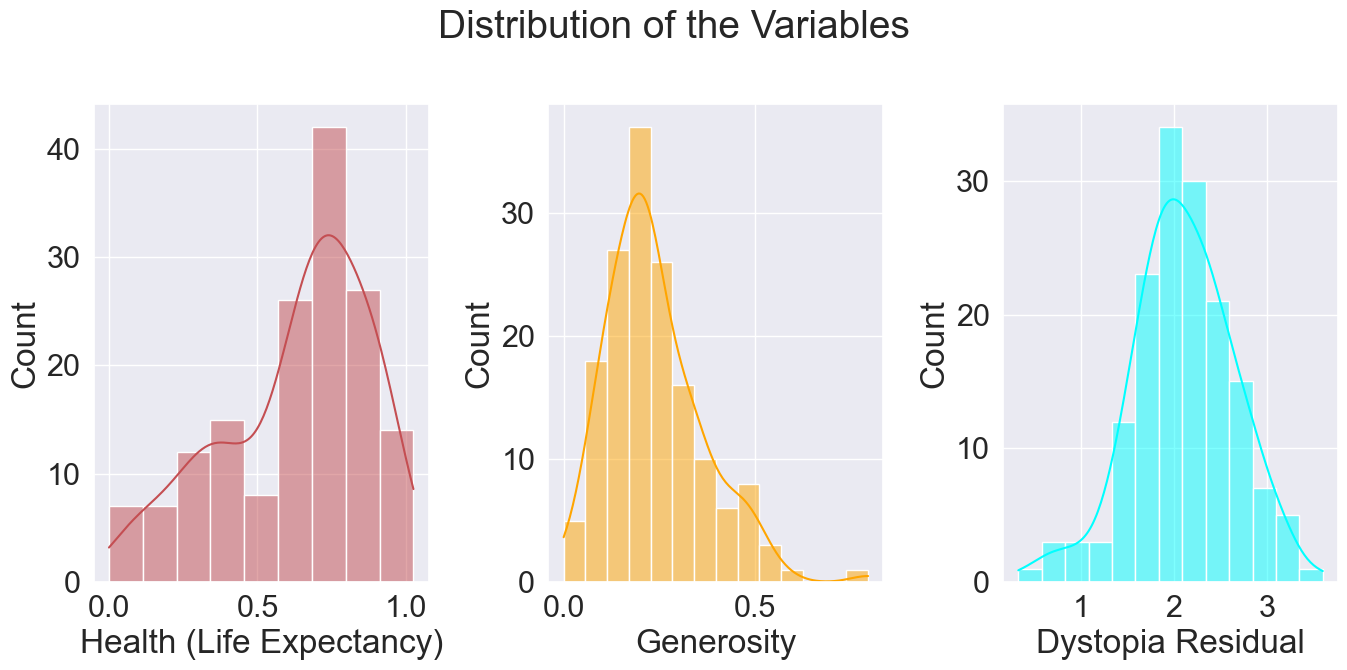

In [55]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,7))

ax1 = sns.histplot(data15['Health (Life Expectancy)'],kde=True,color='r',ax=ax1) 
ax2 = sns.histplot(data15['Generosity'],kde=True,color='orange',ax=ax2) 
ax3 = sns.histplot(data15['Dystopia Residual'],kde=True,color='cyan',ax=ax3) 

fig.suptitle("Distribution of the Variables",fontsize=28)

plt.tight_layout()

In [56]:
data15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

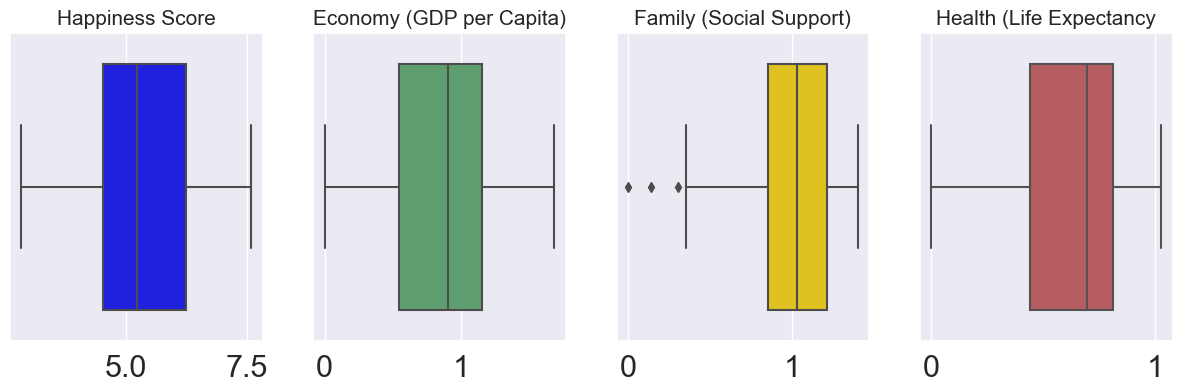

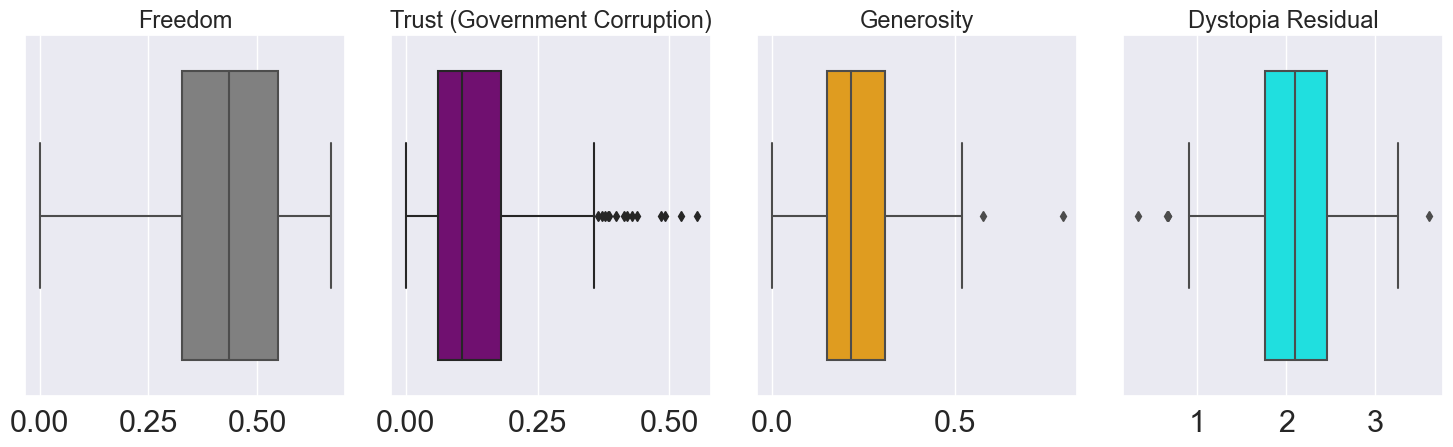

In [57]:
#fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,4,figsize=(15,4));
axes[0] = sns.boxplot(x=data15['Happiness Score'],ax=axes[0],color='blue')
axes[0].set_title('Happiness Score',fontsize=15);
axes[0].set_xlabel('',fontsize=1);
axes[1] = sns.boxplot(x=data15['Economy (GDP per Capita)'],ax=axes[1],color='g')
axes[1].set_title('Economy (GDP per Capita)',fontsize=15);
axes[1].set_xlabel('',fontsize=1);
axes[2] = sns.boxplot(x=data15['Family'],ax=axes[2],color='gold')
axes[2].set_title('Family (Social Support)',fontsize=15);
axes[2].set_xlabel('',fontsize=1);
axes[3] = sns.boxplot(x=data15['Health (Life Expectancy)'],ax=axes[3],color='r')
axes[3].set_title('Health (Life Expectancy',fontsize=15);
axes[3].set_xlabel('',fontsize=1);

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,4,figsize=(15,5));
axes[0] = sns.boxplot(x=data15['Freedom'],ax=axes[0],color='grey')
axes[0].set_title('Freedom',fontsize=17);
axes[0].set_xlabel('',fontsize=1);
axes[1] = sns.boxplot(x=data15['Trust (Government Corruption)'],ax=axes[1],color='purple')
axes[1].set_title('Trust (Government Corruption)',fontsize=17);
axes[1].set_xlabel('',fontsize=1);
axes[2] = sns.boxplot(x=data15['Generosity'],ax=axes[2],color='orange')
axes[2].set_title('Generosity',fontsize=17);
axes[2].set_xlabel('',fontsize=1);
axes[3] = sns.boxplot(x=data15['Dystopia Residual'],ax=axes[3],color='cyan')
axes[3].set_title('Dystopia Residual',fontsize=17);
axes[3].set_xlabel('',fontsize=1);

plt.tight_layout()

In [58]:
mean15 = data15['Happiness Score'].mean()
mean19 = data19['Score'].mean()
delta_mean = mean19 - mean15

print('mean 2015 = {:.3f}; mean 2019 = {:.3f}; mean 2019 - mean 2015 = {:.3f}'.format(mean15,mean19,delta_mean))

mean 2015 = 5.376; mean 2019 = 5.407; mean 2019 - mean 2015 = 0.031


In [59]:
std15 = data15['Happiness Score'].std()
std19 = data19['Score'].std()

print('std 2015 = {:.3f}; std 2019 = {:.3f}'.format(std15,std19))

std 2015 = 1.145; std 2019 = 1.113


In [60]:
n15 = len(data15)
n19 = len(data19)

print('n15 = {}; n19 = {}'.format(n15,n19))

n15 = 158; n19 = 156


In [61]:
z_test_an = (mean15 - mean19 - 0) / np.sqrt(std15**2/n15 + std19**2/n19)

print('z_test_an = {:.3f}'.format(z_test_an))

z_test_an = -0.246


In [62]:
print(sm.stats.ztest(data15['Happiness Score'],data19['Score']))

(-0.2460525618551496, 0.8056415444348092)


In [63]:
z_star = 1.96 # z_star value for a 95% confidence interval

lower_limit = delta_mean - z_star * np.sqrt(std15**2/n15 + std19**2/n19)
upper_limit = delta_mean + z_star * np.sqrt(std15**2/n15 + std19**2/n19)

print('confidence interval for the means difference = ({:.3f}, {:.3f})'.format(lower_limit,upper_limit))

confidence interval for the means difference = (-0.218, 0.281)


In [64]:
western_europe = []

for country in data15[data15['Region'] == 'Western Europe']['Country']:
    western_europe.append(country)

In [65]:
mean_gdp_europe15 = data15[data15['Region'] == 'Western Europe']['Economy (GDP per Capita)'].mean()
mean_gdp_europe19 = data19[data19['Country or region'].isin(western_europe)]['GDP per capita'].mean()
delta_gdp = mean_gdp_europe19 - mean_gdp_europe15

print('GDP mean 2015 = {:.3f}; GDP mean 2019 = {:.3f}; GDP mean 2019 - GDP mean 2015 = {:.3f}'.format(mean_gdp_europe15,mean_gdp_europe19,delta_gdp))

GDP mean 2015 = 1.299; GDP mean 2019 = 1.362; GDP mean 2019 - GDP mean 2015 = 0.063


In [66]:
std15 = data15[data15['Region'] == 'Western Europe']['Economy (GDP per Capita)'].std()
std19 = data19[data19['Country or region'].isin(western_europe)]['GDP per capita'].std()

n15 = len(data15[data15['Region'] == 'Western Europe'])
n19 = len(data19[data19['Country or region'].isin(western_europe)])

sp = np.sqrt(((n15-1)*std15**2+(n19-1)*std19**2)/(n15+n19-2))

std_err = sp * np.sqrt(1/n15 + 1/n19)

print('pooled standard error = {:.3f}'.format(std_err))

pooled standard error = 0.031


In [67]:
t = delta_gdp / std_err

print('t-value = {:.3f}'.format(t))

t-value = 2.080


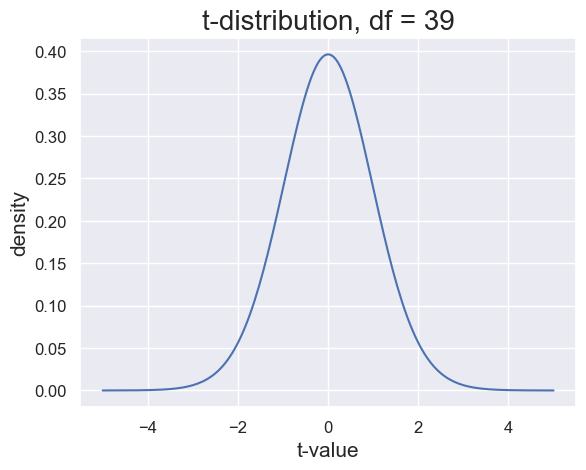

In [68]:
import scipy.stats as stats

XX = np.linspace(-5,5,200)

# Generate t-distribution for a specific choice of df
YY = stats.t.pdf(XX,df=39)

plt.title('t-distribution, df = 39',fontsize=20)
plt.xlabel('t-value',fontsize=15)
plt.ylabel('density',fontsize=15)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.plot(XX,YY);

In [69]:
t_star = 2.023

lower_limit_gdp = delta_gdp - t_star * std_err
upper_limit_gdp = delta_gdp + t_star * std_err

print('confidence interval for the gdp means difference = ({:.3f}, {:.3f})'.format(lower_limit_gdp,upper_limit_gdp))

confidence interval for the gdp means difference = (0.002, 0.125)


In [70]:
print(sm.stats.ttest_ind(data19[data19['Country or region'].isin(western_europe)]['GDP per capita'],data15[data15['Region'] == 'Western Europe']['Economy (GDP per Capita)']))

(2.080202805705671, 0.044125014332580814, 39.0)


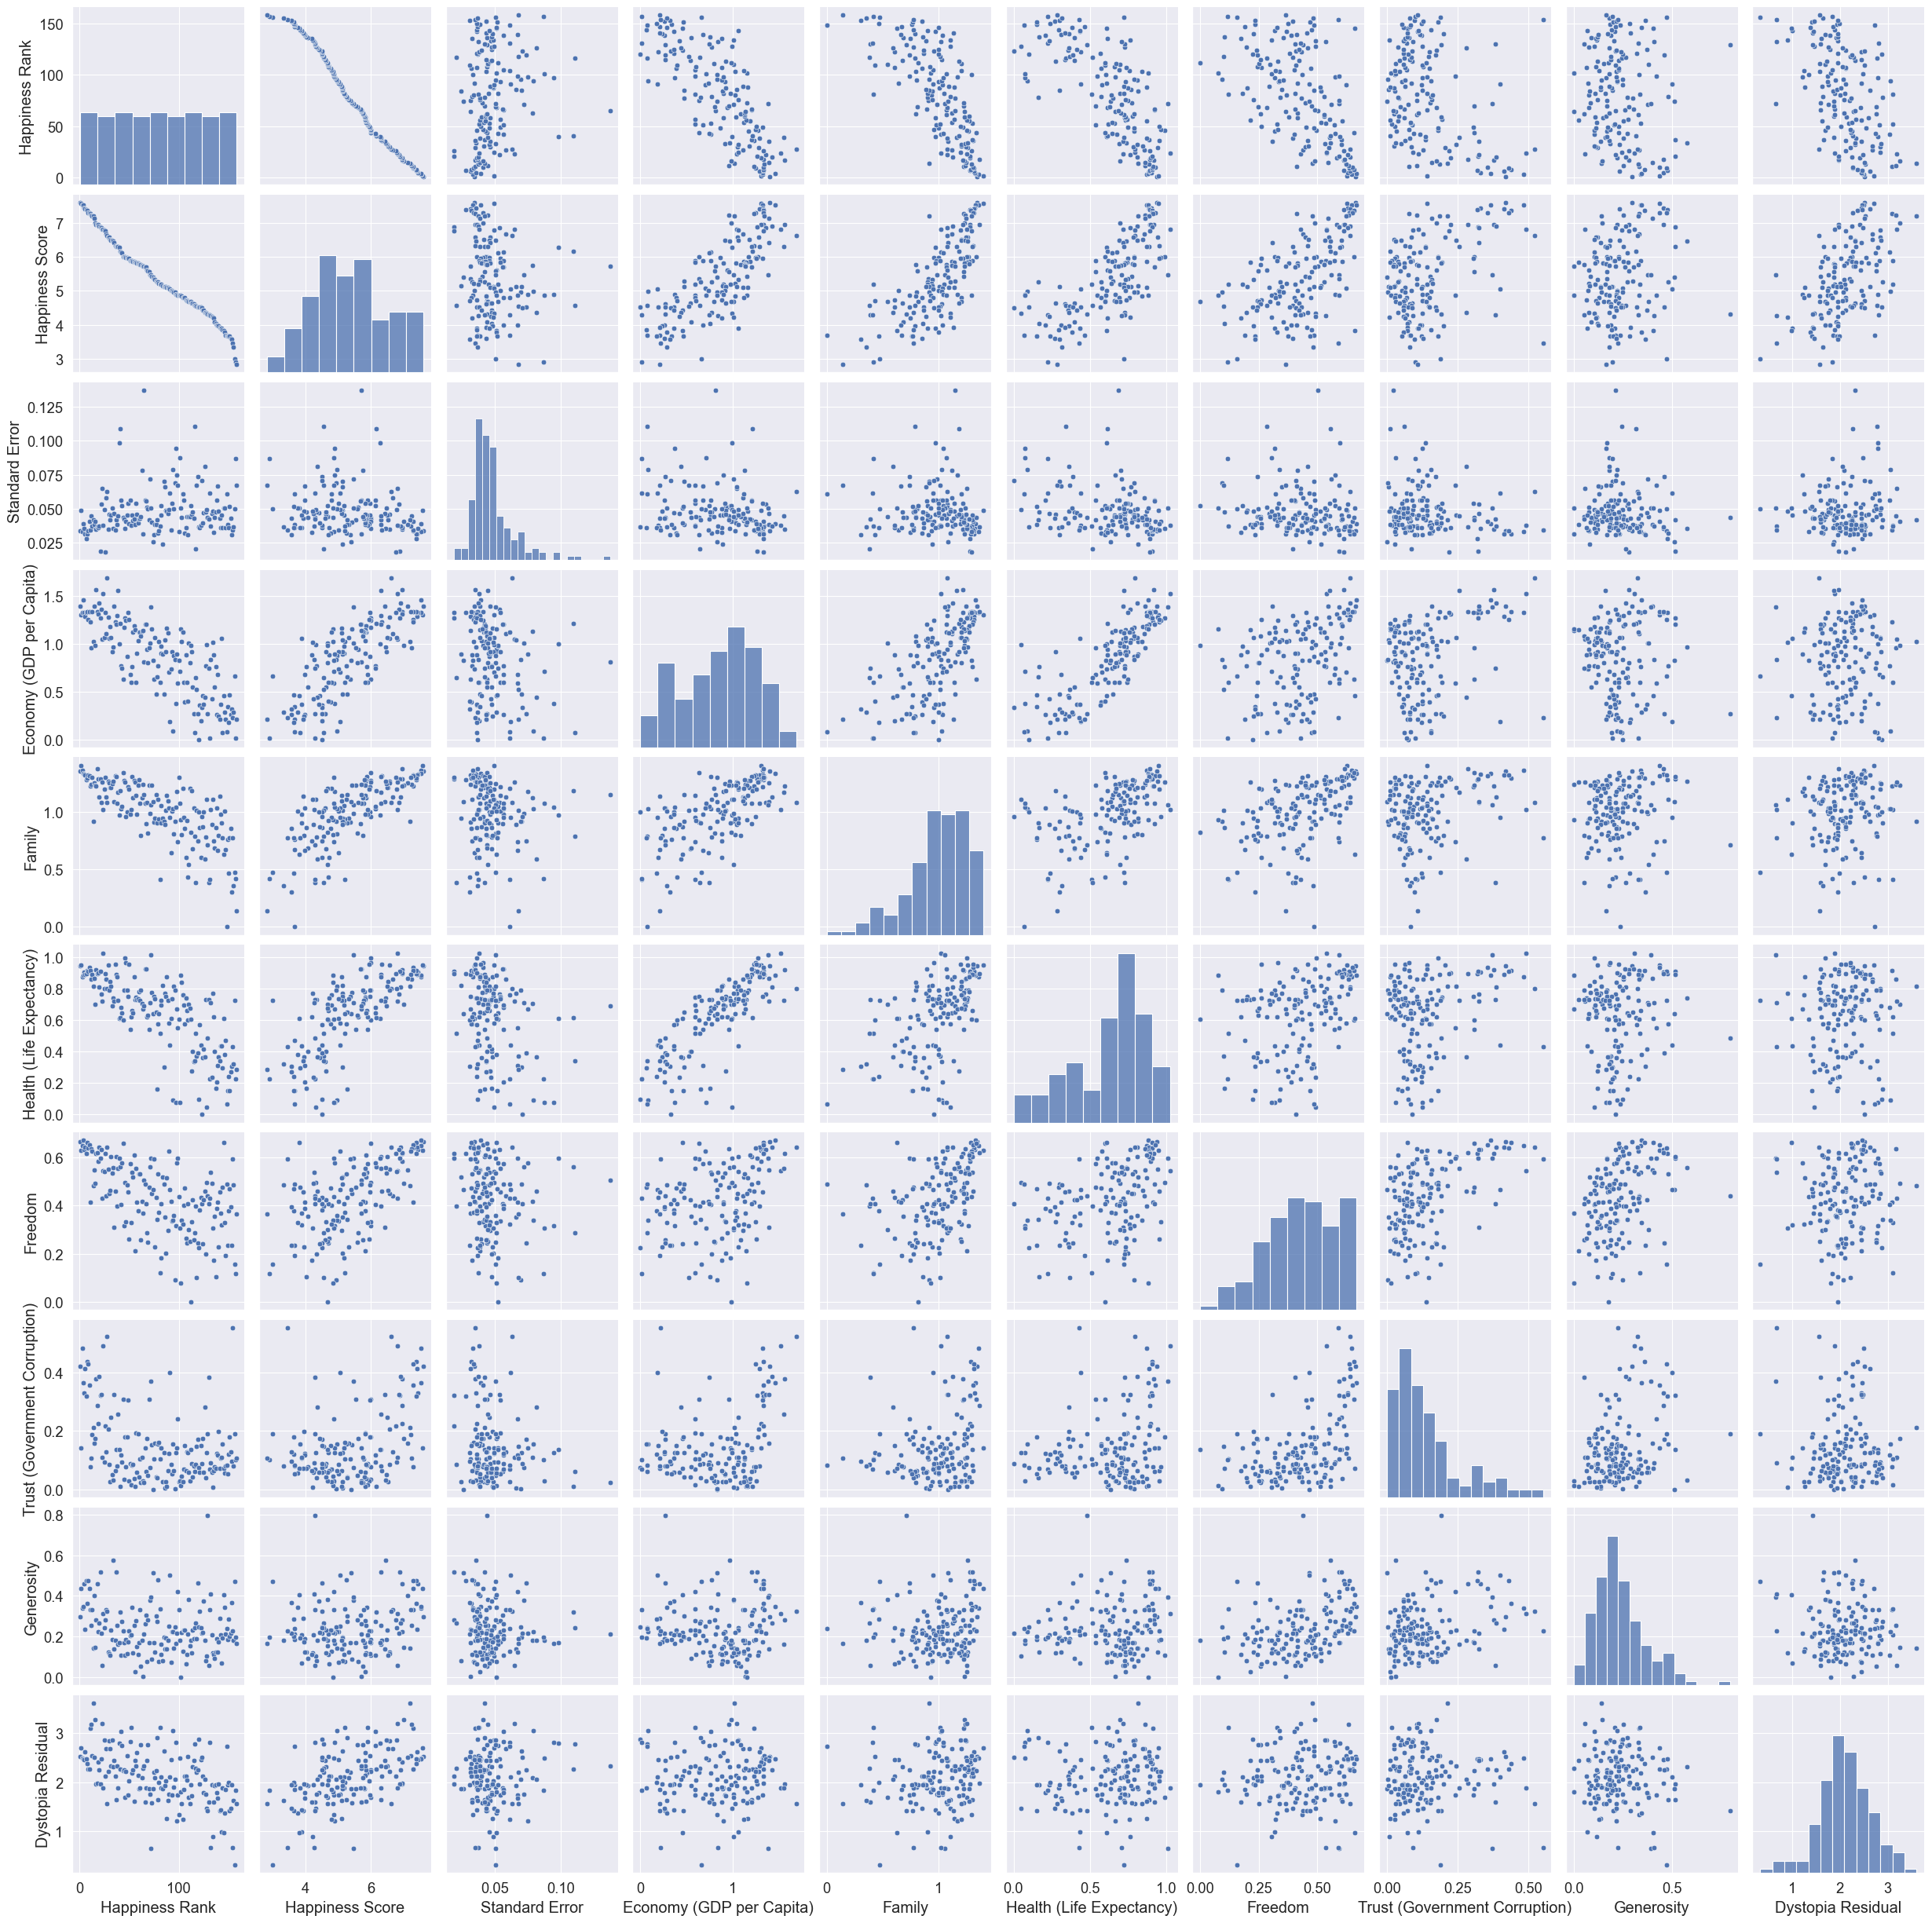

In [71]:
sns.set_context("paper",font_scale=1.5)  
sns.pairplot(data15)

In [72]:
data15 = data15.drop(columns=['Happiness Rank','Standard Error'],axis=1)

data15

Country                           Region  Happiness Score  \
0    Switzerland                   Western Europe            7.587   
1        Iceland                   Western Europe            7.561   
2        Denmark                   Western Europe            7.527   
3         Norway                   Western Europe            7.522   
4         Canada                    North America            7.427   
..           ...                              ...              ...   
153       Rwanda               Sub-Saharan Africa            3.465   
154        Benin               Sub-Saharan Africa            3.340   
155        Syria  Middle East and Northern Africa            3.006   
156      Burundi               Sub-Saharan Africa            2.905   
157         Togo               Sub-Saharan Africa            2.839   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                          0.41978     0.29678            2.51738  
1                          0.14145     0.43630            2.70201  
2                          0.48357     0.34139            2.49204  
3                          0.36503     0.34699            2.46531  
4                          0.32957     0.45811            2.45176  
..                             ...         ...                ...  
153                        0.55191     0.22628            0.67042  
154                        0.08010     0.18260            1.63328  
155                        0.18906     0.47179            0.32858  
156                        0.10062     0.19727            1.83302  
157                        0.10731     0.16681            1.56726  

[158 rows x 10 columns]

In [73]:
def outlier_imputer(data,features):
    
    data_out = data.copy()
    
    for column in features:        
        
        # First define the first and third quartiles
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL = Q1 - 1.5 * IQR
        higherL = Q3 + 1.5 * IQR
        
        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL
        
    return data_out

features = ['Family','Trust (Government Corruption)','Generosity','Dystopia Residual']

data15_clean = outlier_imputer(data15,features) 

<Figure size 1000x700 with 0 Axes>

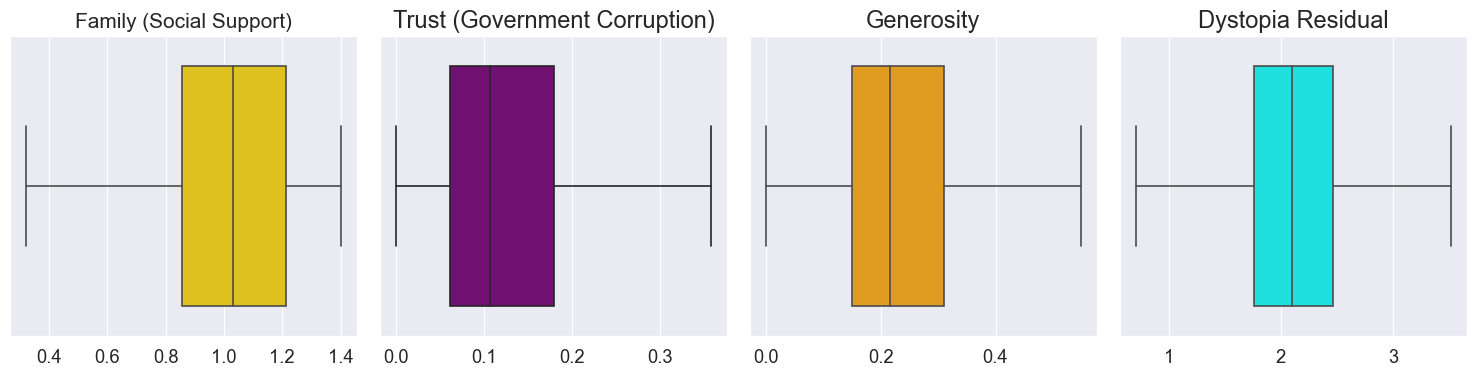

In [74]:
fig = plt.figure(figsize=(10,7));

fig,axes = plt.subplots(1,4,figsize=(15,4));
axes[0] = sns.boxplot(x=data15_clean['Family'],ax=axes[0],color='gold')
axes[0].set_title('Family (Social Support)',fontsize=15);
axes[0].set_xlabel('',fontsize=1);
axes[1] = sns.boxplot(x=data15_clean['Trust (Government Corruption)'],ax=axes[1],color='purple')
axes[1].set_title('Trust (Government Corruption)',fontsize=17);
axes[1].set_xlabel('',fontsize=1);
axes[2] = sns.boxplot(x=data15_clean['Generosity'],ax=axes[2],color='orange')
axes[2].set_title('Generosity',fontsize=17);
axes[2].set_xlabel('',fontsize=1);
axes[3] = sns.boxplot(x=data15_clean['Dystopia Residual'],ax=axes[3],color='cyan')
axes[3].set_title('Dystopia Residual',fontsize=17);
axes[3].set_xlabel('',fontsize=1);

plt.tight_layout();

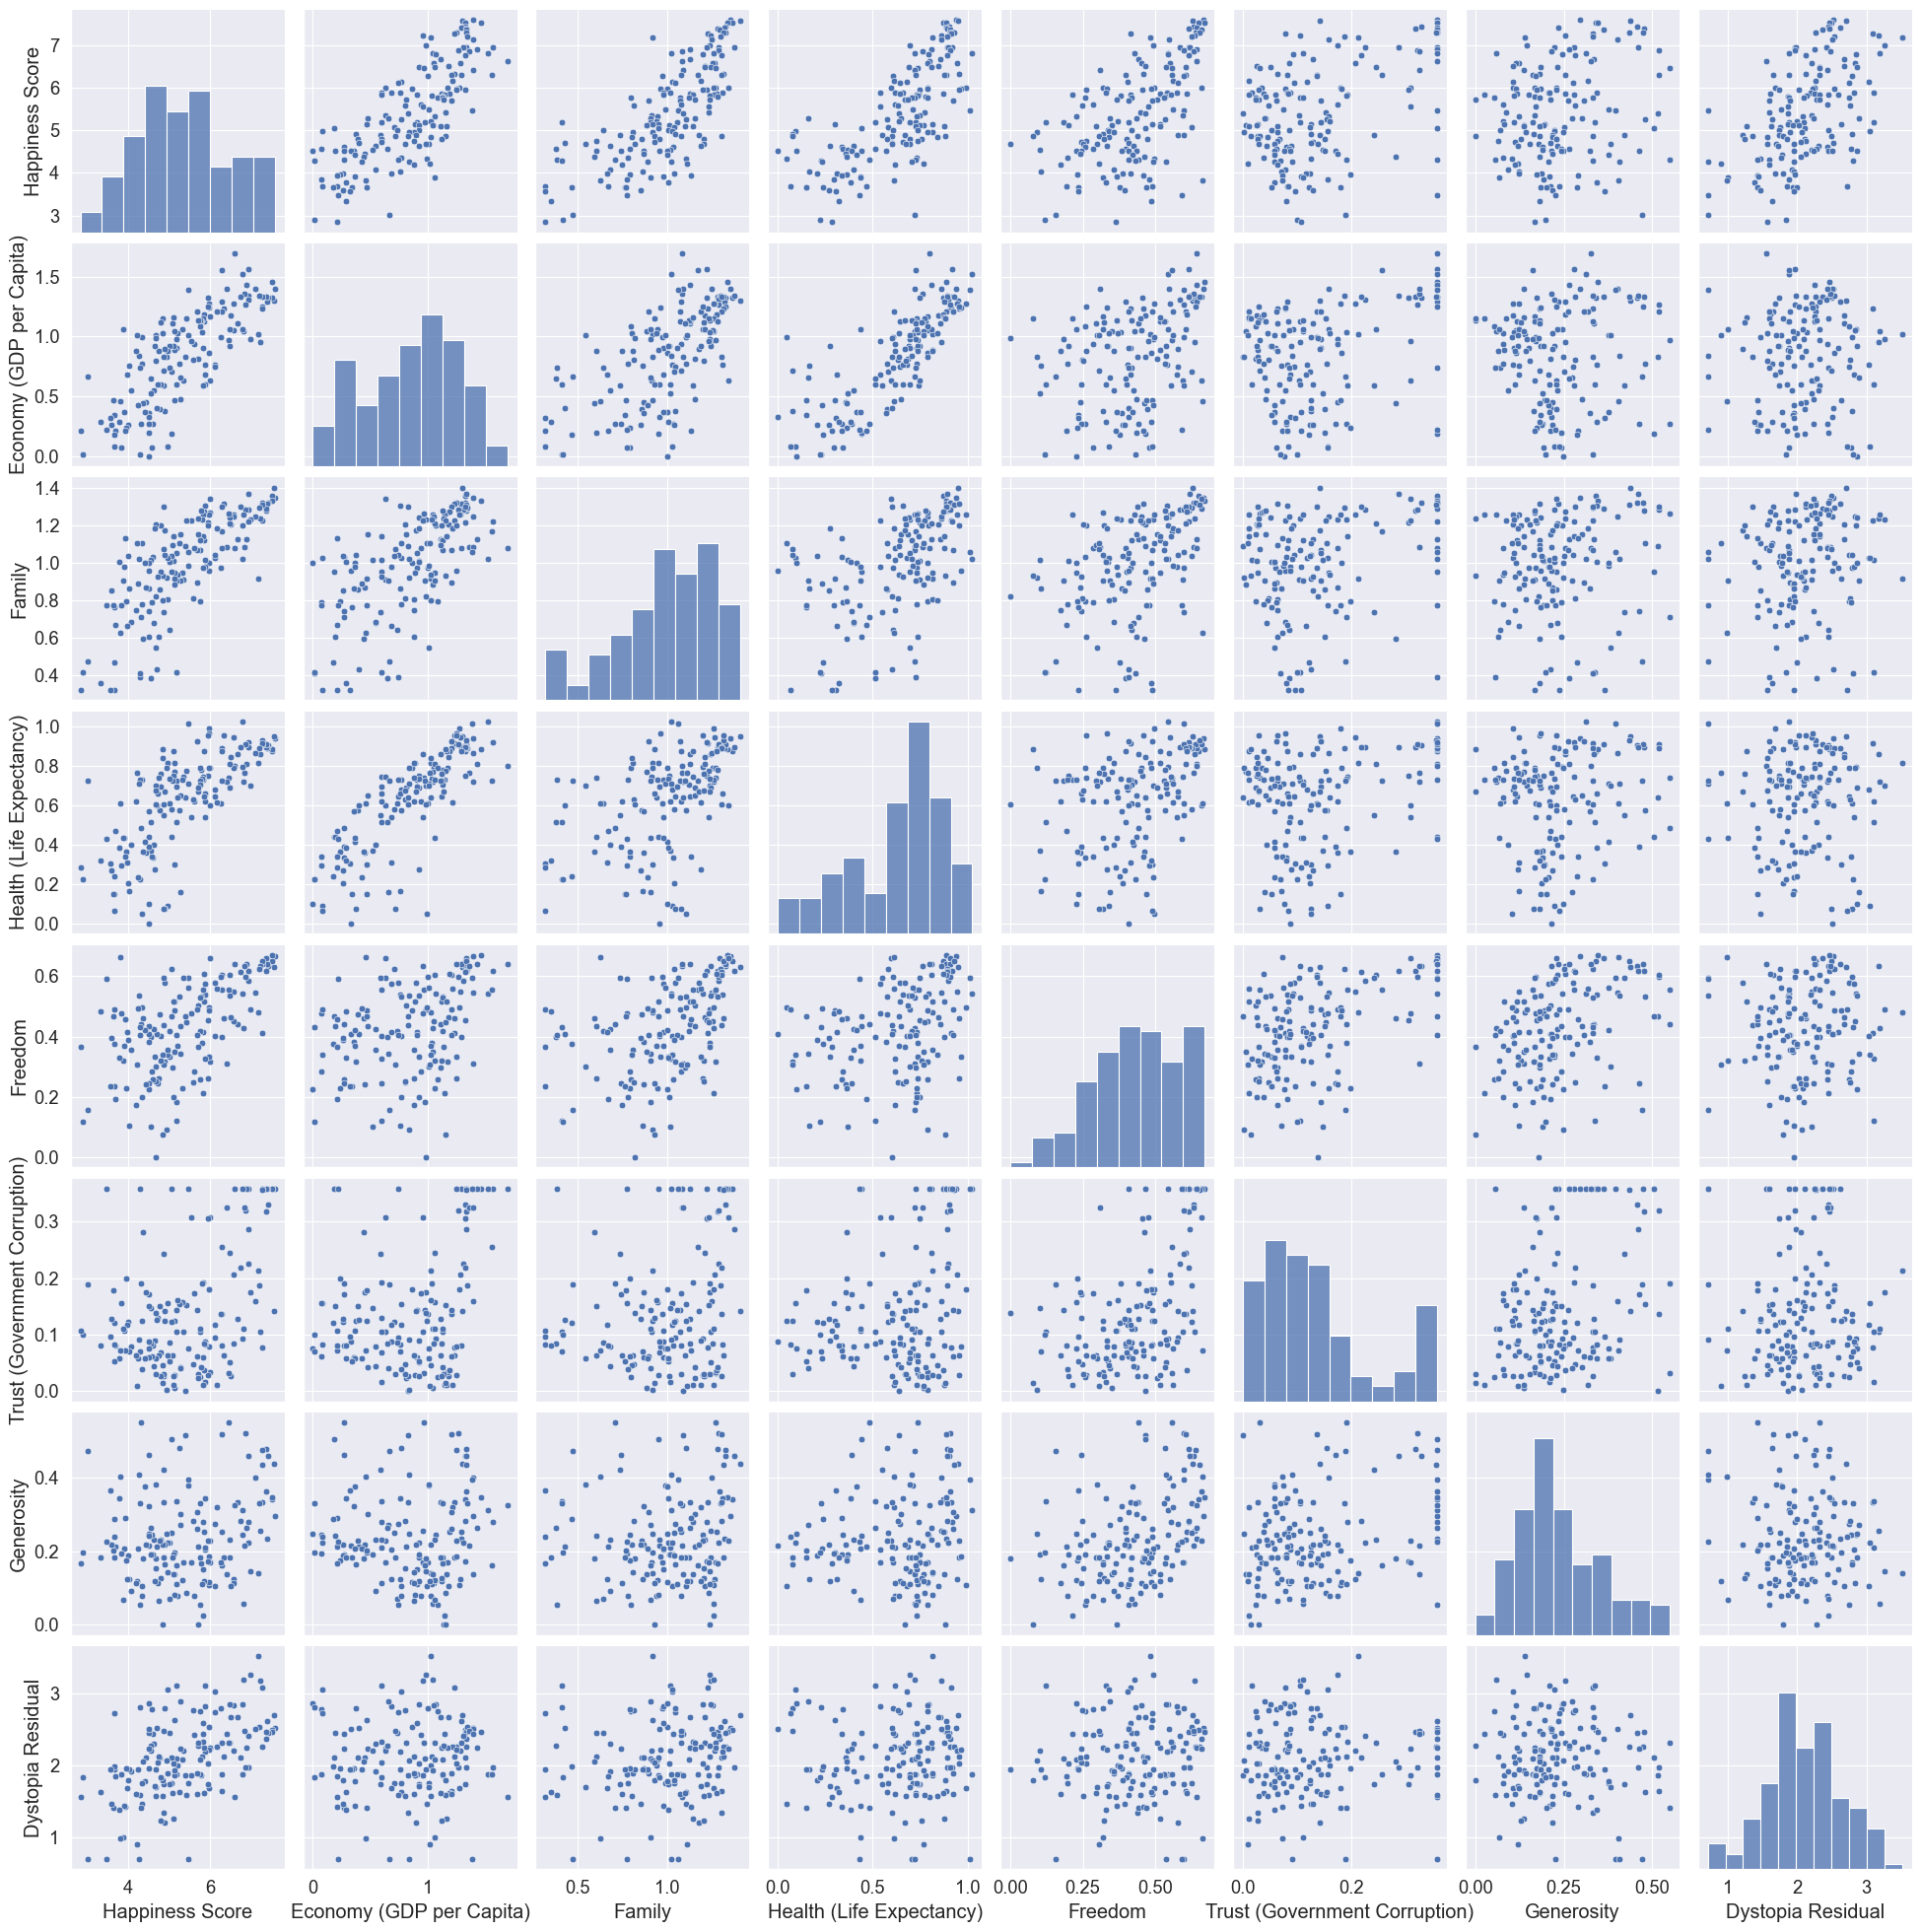

In [75]:
sns.set_context("paper",font_scale=1.5)  
sns.pairplot(data15_clean)

In [76]:
data15_clean = data15_clean.rename({'Happiness Score':'Score', 'Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia'},axis=1)

data15_clean.columns

Index(['Country', 'Region', 'Score', 'GDP', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Dystopia'],
      dtype='object')

In [77]:
lg = sm.OLS.from_formula("Score ~ C(Region) + GDP + Family + Health + Freedom + Trust + Generosity + Dystopia",data15_clean)
res = lg.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4910.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          5.59e-185
Time:                        15:48:12   Log-Likelihood:                 254.57
No. Observations:                 158   AIC:                            -475.1
Df Residuals:                     141   BIC:                            -423.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.0985      0.062     -1.596      0.113      -0.220       0.023
C(Region)[T.Central and Eastern Europe]          0.0054      0.042      0.130      0.897      -0.077       0.088
C(Region)[T.Eastern Asia]                       -0.0071      0.044     -0.160      0.873      -0.095       0.080
C(Region)[T.Latin America and Caribbean]         0.0041      0.041      0.101      0.920      -0.077       0.085
C(Region)[T.Middle East and Northern Africa]    -0.0063      0.041     -0.154      0.878      -0.088       0.075
C(Region)[T.North America]                      -0.0193      0.052     -0.375      0.708      -0.121       0.082
C(Region)[T.Southeastern Asia]                   0.0693      0.043      1.618      0.108      -0.015       0.154
C(Region)[T.Southern Asia]                       0.0354      0.046      0.773      0.441      -0.055       0.126
C(Region)[T.Sub-Saharan Africa]                  0.0239      0.046      0.518      0.605      -0.067       0.115
C(Region)[T.Western Europe]                     -0.0034      0.039     -0.088      0.930      -0.080       0.073
GDP                                              0.9958      0.022     44.777      0.000       0.952       1.040
Family                                           1.0600      0.024     43.928      0.000       1.012       1.108
Health                                           1.0367      0.042     24.596      0.000       0.953       1.120
Freedom                                          0.9786      0.039     24.823      0.000       0.901       1.057
Trust                                            1.1501      0.051     22.741      0.000       1.050       1.250
Generosity                                       0.9414      0.045     20.822      0.000       0.852       1.031
Dystopia                                         1.0059      0.009    118.175      0.000       0.989       1.023
==============================================================================
Omnibus:                      118.001   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3001.143
Skew:                          -2.222   Prob(JB):                         0.00
Kurtosis:                      23.884   Cond. No.                         91.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lg = sm.OLS.from_formula("Score ~ GDP + Family + Health + Freedom + Trust + Generosity + Dystopia",data15_clean)
res = lg.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.092e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.20e-199
Time:                        15:48:12   Log-Likelihood:                 247.54
No. Observations:                 158   AIC:                            -479.1
Df Residuals:                     150   BIC:                            -454.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0625      0.023     -2.683      0.008      -0.109      -0.016
GDP            0.9864      0.021     47.312      0.000       0.945       1.028
Family         1.0481      0.022     47.080      0.000       1.004       1.092
Health         1.0136      0.030     34.047      0.000       0.955       1.072
Freedom        1.0099      0.037     27.564      0.000       0.938       1.082
Trust          1.1162      0.048     23.489      0.000       1.022       1.210
Generosity     0.9801      0.039     25.085      0.000       0.903       1.057
Dystopia       1.0021      0.008    128.785      0.000       0.987       1.018
==============================================================================
Omnibus:                      125.601   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4077.065
Skew:                          -2.350   Prob(JB):                         0.00
Kurtosis:                      27.438   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
data15[data15['Country'] == 'Finland']

Country          Region  Happiness Score  Economy (GDP per Capita)  \
5  Finland  Western Europe            7.406                   1.29025   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
5  1.31826                   0.88911  0.64169                        0.41372   

   Generosity  Dystopia Residual  
5     0.23351            2.61955

In [80]:
data15[data15['Country'] == 'Finland']['Economy (GDP per Capita)'] + data15[data15['Country'] == 'Finland']['Family'] + data15[data15['Country'] == 'Finland']['Health (Life Expectancy)'] + data15[data15['Country'] == 'Finland']['Freedom'] + data15[data15['Country'] == 'Finland']['Trust (Government Corruption)'] + data15[data15['Country'] == 'Finland']['Generosity'] + data15[data15['Country'] == 'Finland']['Dystopia Residual']

5    7.40609
dtype: float64